In [12]:
#!pip install pandas numpy scipy matplotlib
#!pip install pyarrow
#!pip install plotly xarray
#!pip install ipywidgets
#!pip install kaleido
#!pip install pooch
#!pip install seaborn
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets

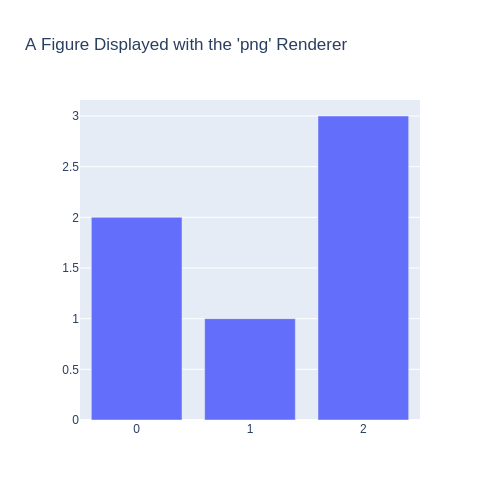

In [13]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "png"

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'png' Renderer"
)
fig.show()

In [14]:
import plotly.express as px
import xarray as xr
# Load xarray from dataset included in the xarray tutorial
#airtemps = xr.tutorial.open_dataset('air_temperature').air.sel(lon=250.0)
#fig = px.imshow(airtemps.T, color_continuous_scale='RdBu_r', origin='lower')
#fig.show()

In [15]:
ds  = xr.tutorial.load_dataset("air_temperature")
dso = xr.tutorial.open_dataset('air_temperature').air.sel(lon=250.0)
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [16]:
dso

<xarray.DataArray 'air' (time: 2920, lat: 25)> Size: 584kB
[73000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
    lon      float32 4B 250.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [17]:
from IPython.display import Image

##fig.to_image(format="png", engine="kaleido")

##fig = px.imshow(dso.T, width=800, height=400, color_continuous_scale='RdBu_r', origin='lower')
#fig.update_layout(width=800, height=400, margin=dict(l=10, r=10, b=10, t=10))
#fig.to_image(format="png", width=1900, height=1350, scale=2)
#fig.show()
##img_bytes = fig.to_image(format="png", width=1200, height=900, scale=1)
##Image(img_bytes)

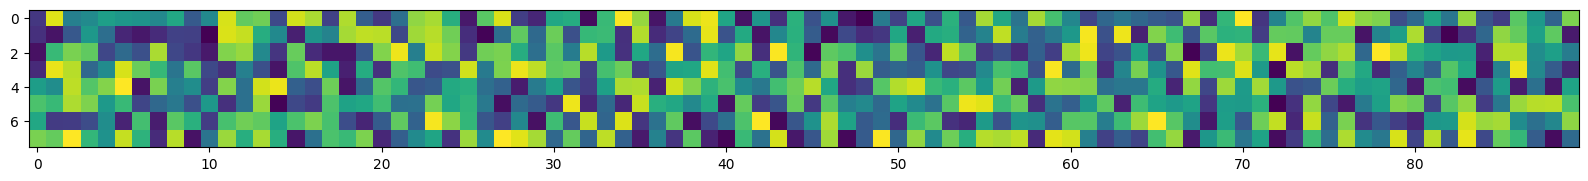

In [18]:
from matplotlib import pyplot as plt
import random
import numpy as np

random = np.random.random ([8,90])

plt.figure(figsize = (20,2))
plt.imshow(random, interpolation='nearest')

In [19]:
import pandas as pd
#hourly_df2 = pd.read_parquet('./oasis_07_23.parquet')
hourly_df2 = pd.read_parquet('./oasis_07_24.parquet')
hourly_df2

datetime  hour_index  load_MW
datetime                                                    
2007-01-01 00:00:00 2007-01-01 00:00:00           1   1580.0
2007-01-01 01:00:00 2007-01-01 01:00:00           2   1533.0
2007-01-01 02:00:00 2007-01-01 02:00:00           3   1495.0
2007-01-01 03:00:00 2007-01-01 03:00:00           4   1446.0
2007-01-01 04:00:00 2007-01-01 04:00:00           5   1406.0
...                                 ...         ...      ...
2024-12-31 19:00:00 2024-12-31 19:00:00        8779      NaN
2024-12-31 20:00:00 2024-12-31 20:00:00        8780      NaN
2024-12-31 21:00:00 2024-12-31 21:00:00        8781      NaN
2024-12-31 22:00:00 2024-12-31 22:00:00        8782      NaN
2024-12-31 23:00:00 2024-12-31 23:00:00        8783      NaN

[157798 rows x 3 columns]

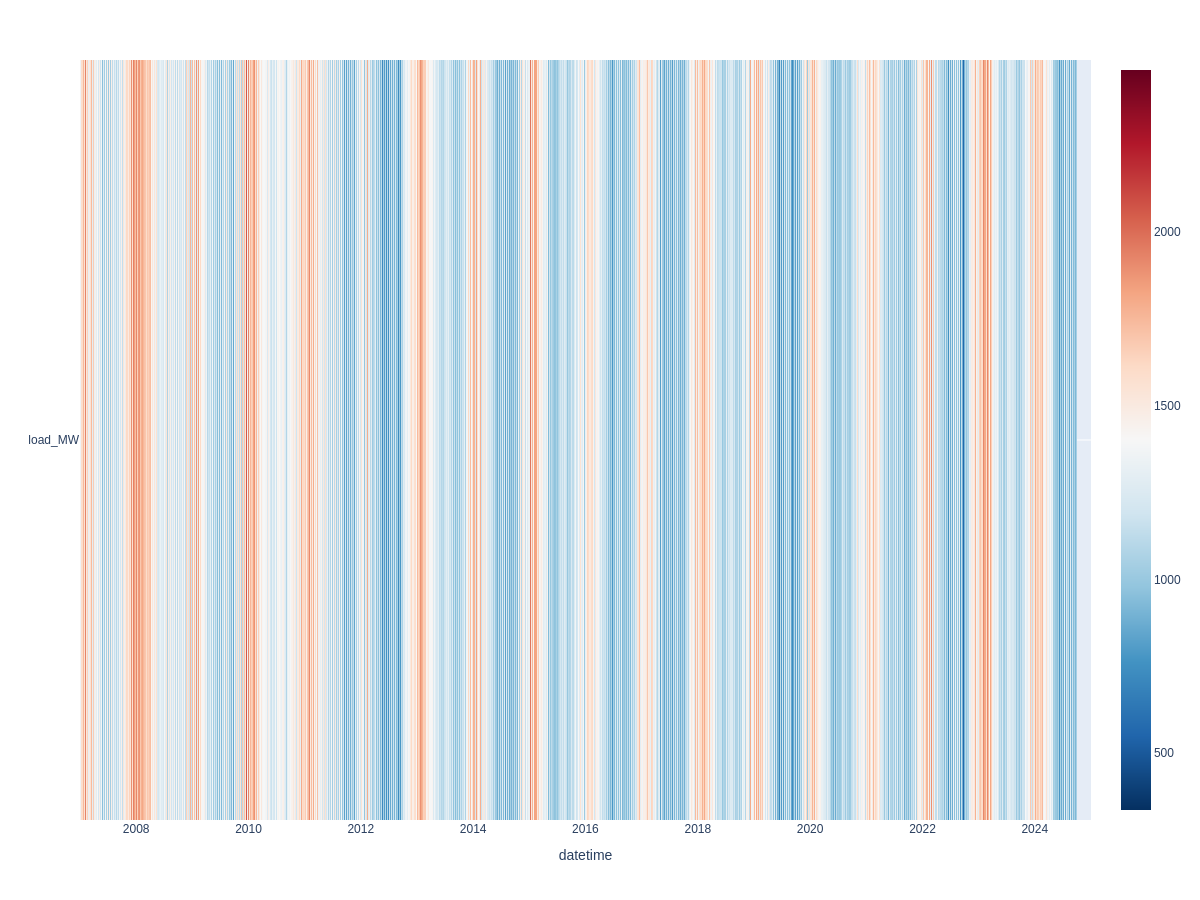

In [20]:
oasis = hourly_df2[['load_MW']]
oasis
fig2 = px.imshow(oasis.T, width=800, height=400, color_continuous_scale='RdBu_r', origin='lower')
img_bytes2 = fig2.to_image(format="png", width=1200, height=900, scale=1)
Image(img_bytes2)

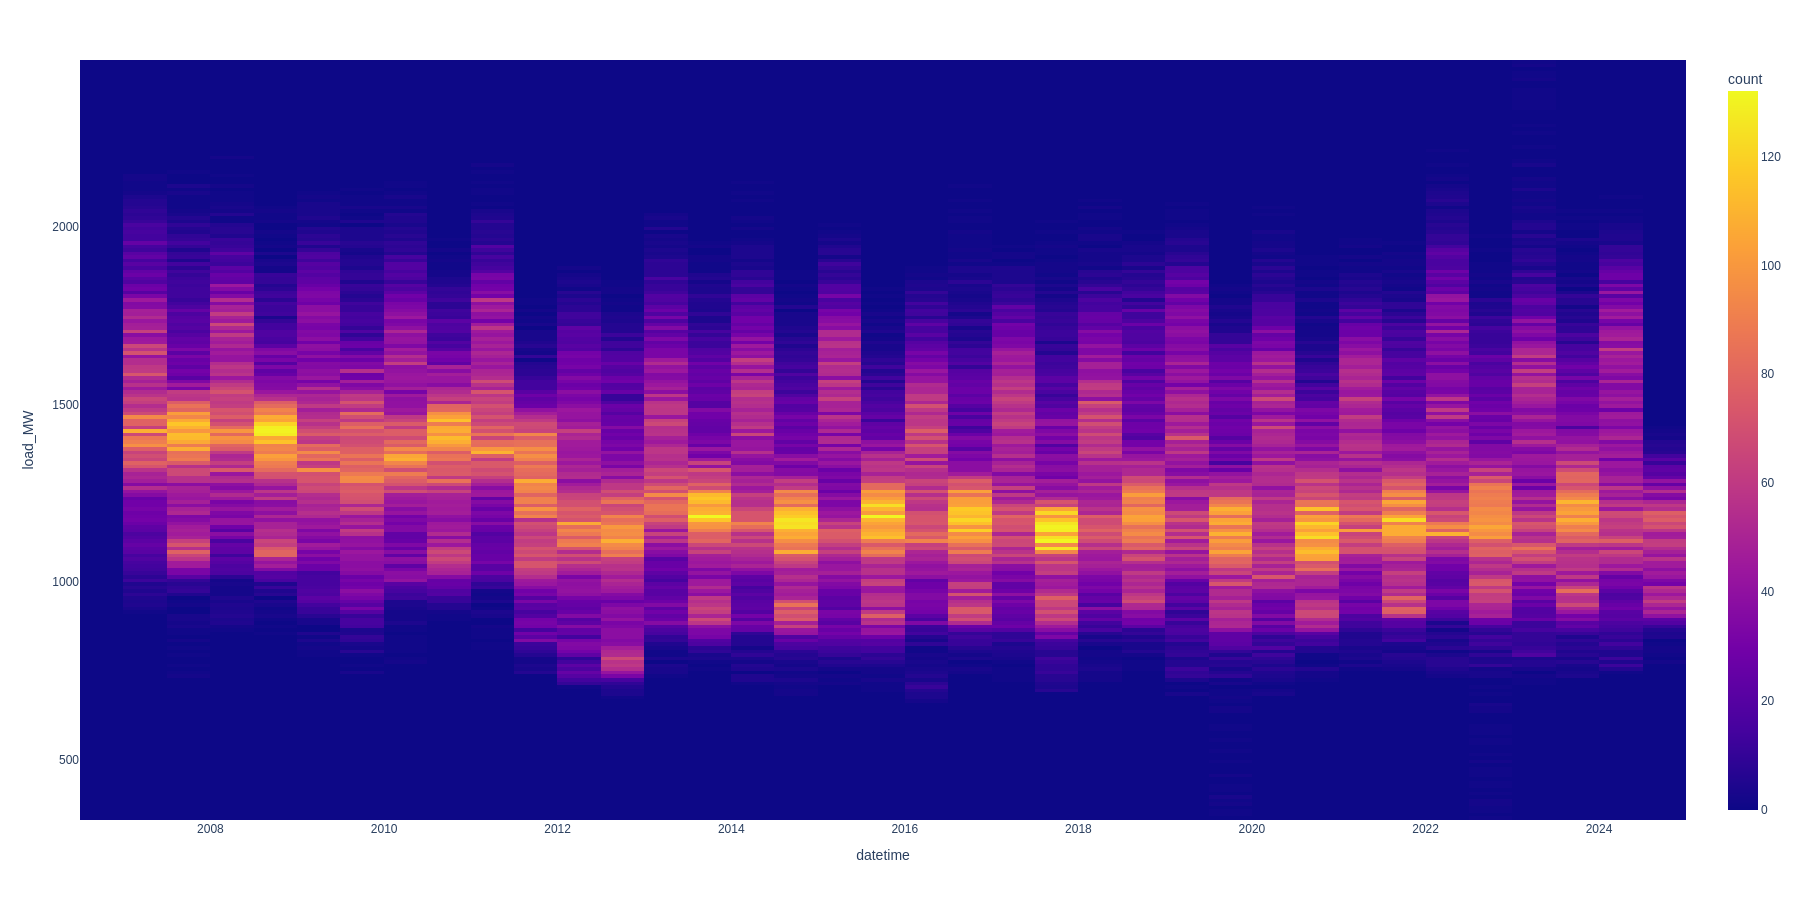

In [21]:
import plotly.express as px
#df = px.data.tips()

fig = px.density_heatmap(hourly_df2[['datetime','load_MW']], x="datetime", y="load_MW", nbinsx=37, nbinsy=240, width=1200, height=200)
#fig.show()
img_bytes3 = fig.to_image(format="png", width=1800, height=900, scale=1)
Image(img_bytes3)

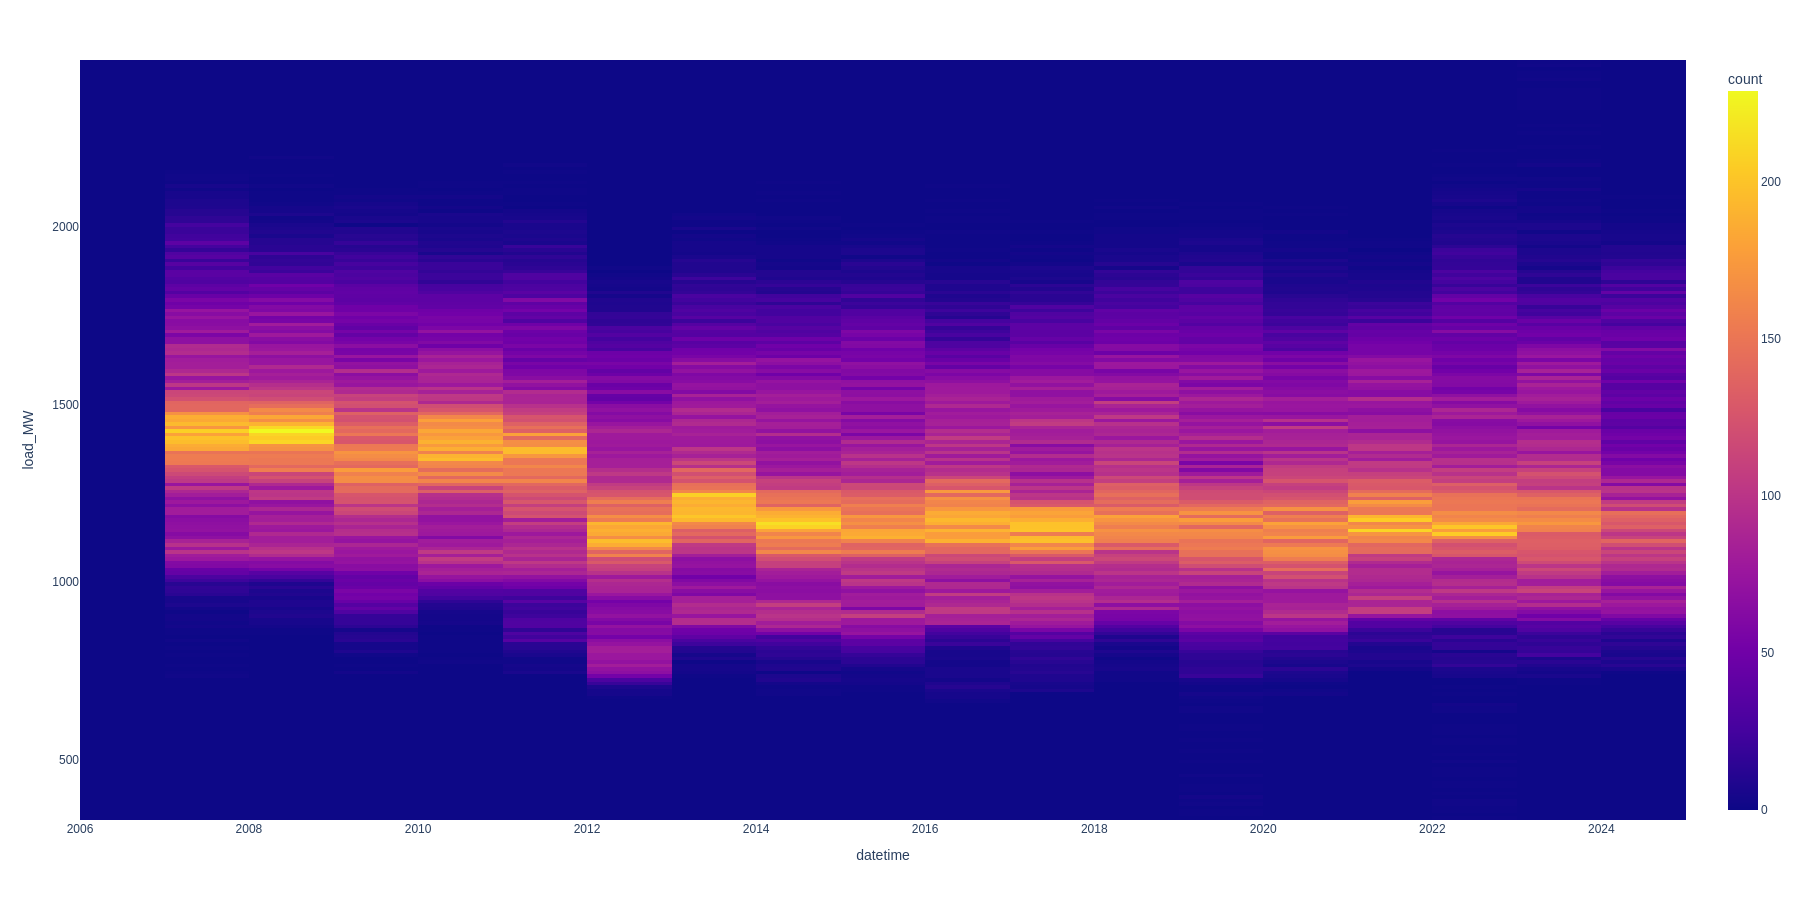

In [22]:
#import plotly.express as px
#df = px.data.tips()

fig = px.density_heatmap(hourly_df2[['datetime','load_MW']], x="datetime", y="load_MW", nbinsx=19, nbinsy=240, width=1200, height=200)
#fig.show()
img_bytes3 = fig.to_image(format="png", width=1800, height=900, scale=1)
Image(img_bytes3)

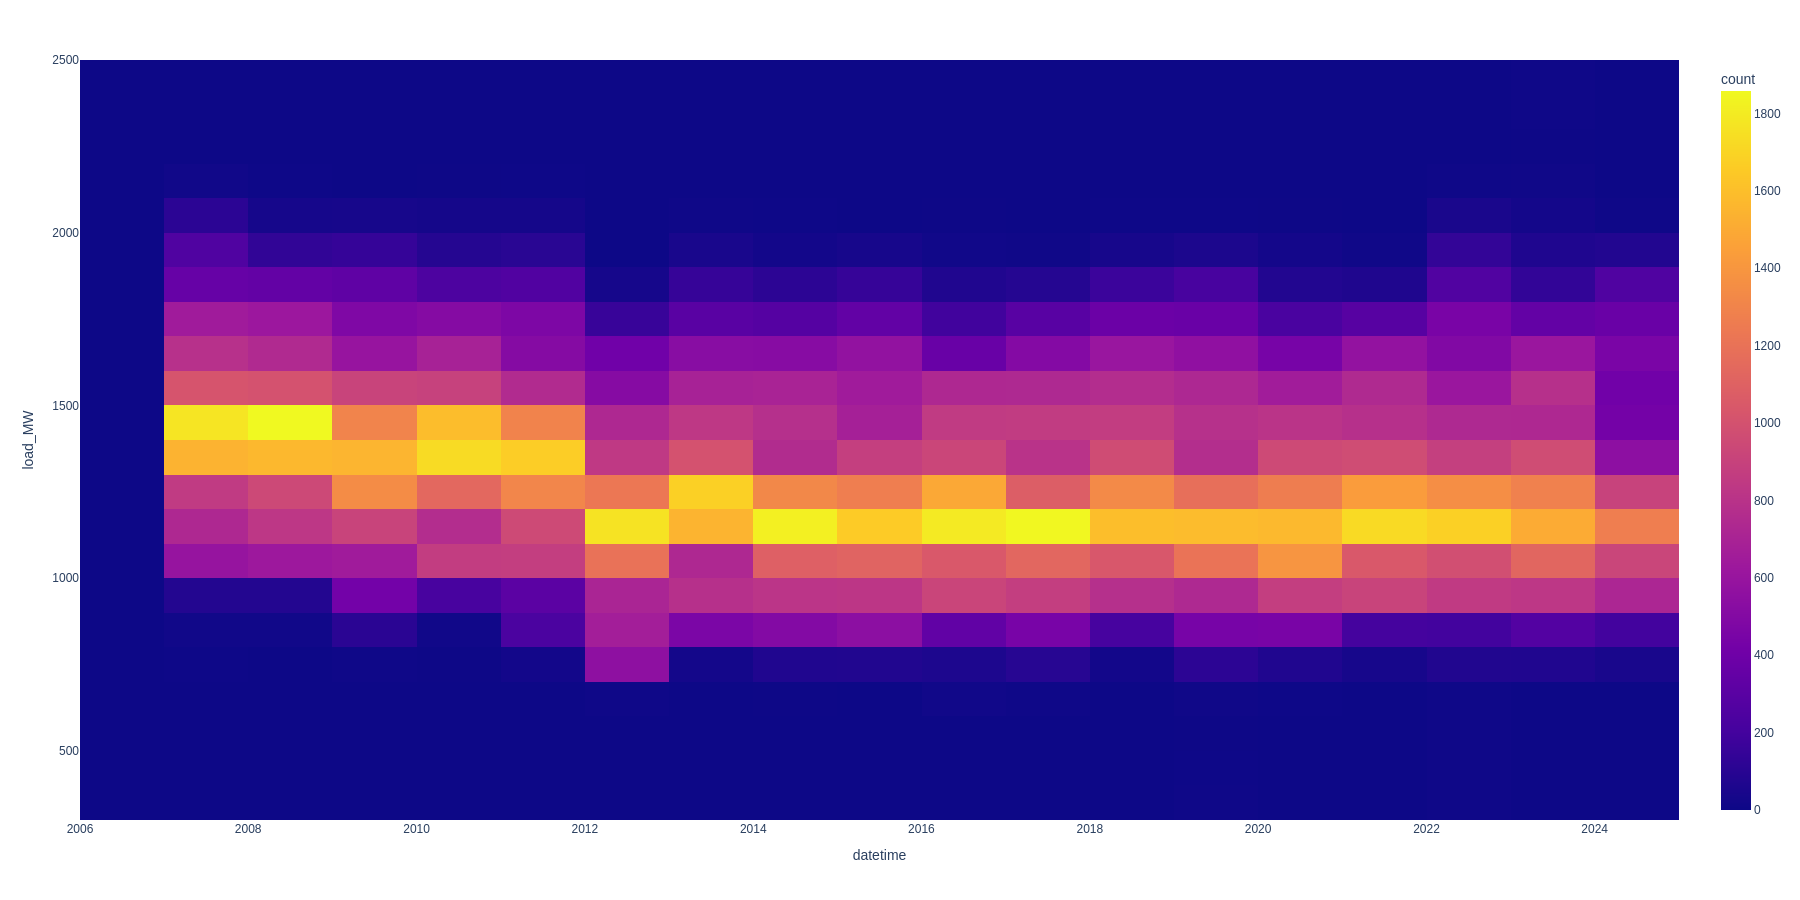

In [23]:
fig = px.density_heatmap(hourly_df2[['datetime','load_MW']], x="datetime", y="load_MW", nbinsx=35, nbinsy=24, width=1200, height=200)
#fig.show()
img_bytes3 = fig.to_image(format="png", width=1800, height=900, scale=1)
Image(img_bytes3)

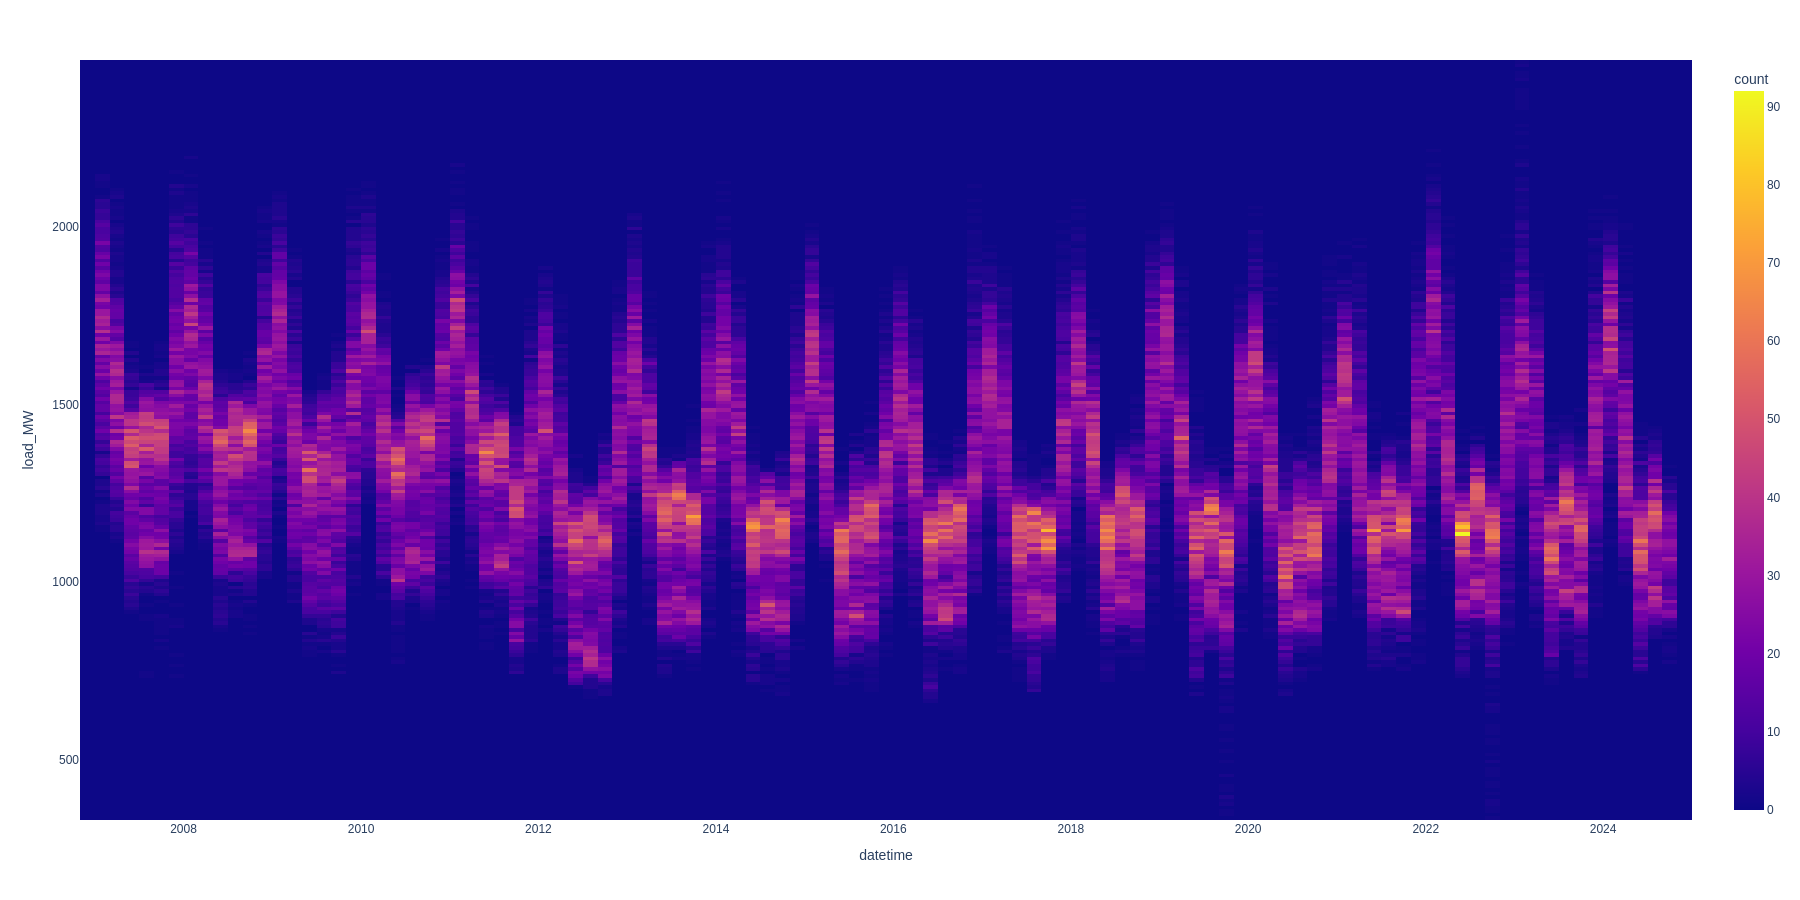

In [24]:
#import plotly.express as px
#df = px.data.tips()

fig = px.density_heatmap(hourly_df2[['datetime','load_MW']], x="datetime", y="load_MW", nbinsx=204, nbinsy=240, width=1200, height=200)
#fig.show()
img_bytes3 = fig.to_image(format="png", width=1800, height=900, scale=1)
Image(img_bytes3)

array([[<Axes: title={'center': 'load_MW'}>]], dtype=object)

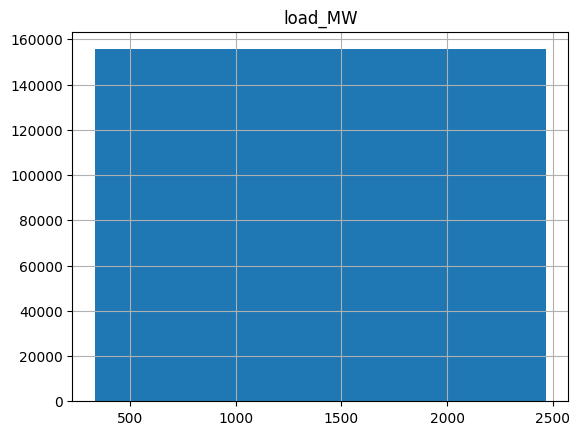

In [25]:
hourly_df2[['load_MW']].hist(bins=1)
#year1[['load_MW']].hist(bins=25)

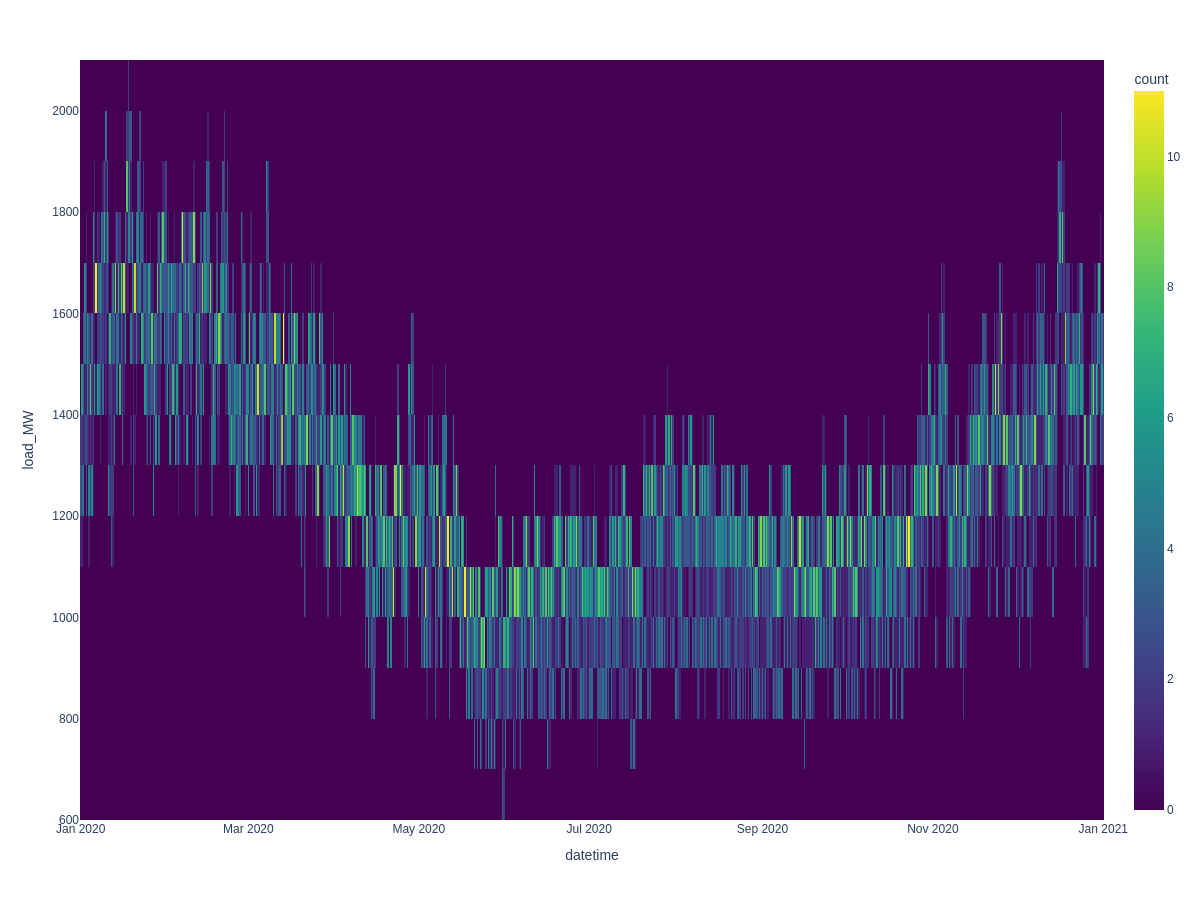

In [26]:
oasis2 = hourly_df2[['datetime','load_MW']]
#oasis2 = oasis2[(oasis2['datetime'] == 2020)]

#df['Date'] = pd.to_datetime(df['Date'])
include = oasis2[oasis2['datetime'].dt.year == 2020]

#big_df[(big_df['lat'] == 47.05282)
fig = px.density_heatmap(include, x="datetime", y="load_MW", nbinsx=1000, nbinsy=20, color_continuous_scale="Viridis", width=800)
img_bytes3 = fig.to_image(format="png", width=1200, height=900, scale=1)
Image(img_bytes3)
#fig.show()

<Axes: xlabel='datetime'>

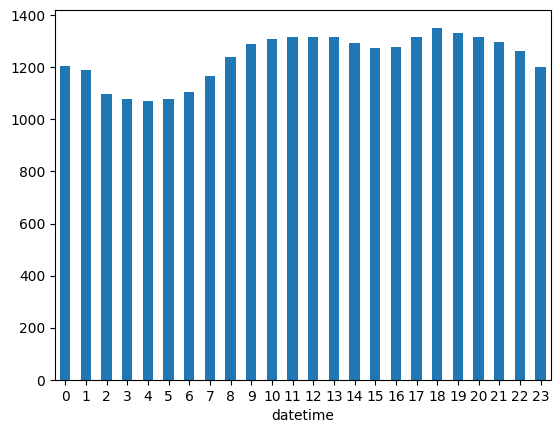

In [27]:
include.groupby(include["datetime"].dt.hour)["load_MW"].mean().plot(kind='bar', rot=0 )

In [28]:
#fig = px.bar(include, x="datetime", y="load_MW", color='load_MW', width=800)
#img_bytes3 = fig.to_image(format="png", width=1200, height=900, scale=1)
#fig.show()
#Image(img_bytes3)

In [29]:
import seaborn as sns
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(2, 1, figsize=(24,12))
#sns.heatmap(oasis2)

In [30]:
df = oasis2.copy()
df['hour'] = df.datetime.dt.hour
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['day'] = df.datetime.dt.day
df['date'] = df.datetime.dt.date
df['weekdayName'] = df.datetime.dt.day_name() # df.date.dt.weekday_name on older Pandas
df['weekday'] = df.datetime.dt.weekday
#df['week'] = df.datetime.dt.week
df['weekend'] = df.datetime.dt.weekday // 5 == 1

In [31]:
import calendar
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="load_MW",index=["hour"],
                                   columns=["month"],
                                   fill_value=0,
                                   margins=True)
named_index = [[hour_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

month            1            2            3            4            5  \
0      1503.353136  1519.414833  1405.123244  1217.460463  1088.224534   
1      1462.109265  1486.299784  1377.942545  1182.477426  1038.711237   
2      1431.965735  1457.152299  1351.382762  1152.321278  1004.319068   
3      1410.200896  1438.389018  1330.655643  1132.382111   984.500448   
4      1402.574444  1434.458978  1325.067079  1128.894241   980.133441   
5      1410.132563  1446.257878  1333.511756  1140.603315   989.257921   
6      1448.012599  1485.970707  1371.801900  1179.491204  1019.068208   
7      1542.031057  1581.199627  1462.346111  1267.359093  1088.212742   
8      1634.141254  1667.159391  1545.906308  1353.193407  1178.419194   
9      1677.647599  1702.363045  1583.404534  1391.660667  1226.821111   
10     1687.243817  1698.264538  1582.595466  1394.592444  1242.542939   
11     1679.739964  1679.265462  1566.831183  1383.665148  1242.546864   
12     1672.398871  1663.574204  1551.583315  1371.967204  1240.256649   
13     1666.735717  1651.569293  1536.650305  1356.732222  1230.719946   
14     1638.467975  1618.227250  1502.632366  1326.571444  1209.235000   
15     1616.150824  1592.814361  1471.129677  1298.455481  1190.932760   
16     1628.062796  1600.051257  1468.041505  1294.376278  1191.461111   
17     1687.461864  1644.619666  1495.207061  1319.020907  1216.937670   
18     1774.622294  1711.386051  1523.866487  1334.295148  1230.640305   
19     1761.851738  1746.213477  1534.086685  1318.607037  1209.205663   
20     1733.177742  1731.018271  1562.520143  1329.582537  1201.225538   
21     1694.704570  1696.077308  1570.718961  1368.746778  1217.763907   
22     1634.178799  1638.843242  1525.824444  1343.265519  1220.924462   
23     1554.036183  1562.026130  1452.614570  1271.997130  1153.868907   
All    1597.958404  1602.192336  1476.500005  1285.738270  1149.830401   

month            6            7            8            9           10  \
0      1038.411500  1083.715968  1099.034695  1026.886889  1081.167894   
1       974.765815  1015.321093  1034.179659   970.800574  1029.782486   
2       929.798759   966.521953   985.394086   928.408315   988.104782   
3       908.620185   944.011953   962.358118   910.163889   968.309867   
4       900.813815   932.431989   950.921971   902.852056   961.981879   
5       903.383815   930.405287   949.322168   905.872463   969.649867   
6       919.639444   944.894229   968.256756   934.800852  1007.250266   
7       985.164870   992.309695  1012.508136  1007.958685  1097.746281   
8      1085.550074  1080.255932  1091.781362  1092.364667  1197.130892   
9      1147.759833  1159.513620  1169.558226  1145.566000  1242.484801   
10     1178.825907  1212.849731  1225.272312  1178.027352  1257.467628   
11     1193.773685  1244.296541  1257.651971  1194.304556  1258.824459   
12     1204.992167  1264.218387  1278.861918  1206.109889  1257.903435   
13     1203.231593  1267.232151  1282.514337  1205.219111  1246.879886   
14     1191.636852  1259.782043  1273.537706  1194.130259  1226.986907   
15     1176.957815  1248.237509  1261.530215  1182.225370  1208.737457   
16     1179.573000  1248.740860  1263.478315  1188.252037  1214.475920   
17     1201.131204  1265.430914  1283.494194  1212.794963  1242.448937   
18     1208.884333  1269.072832  1288.428208  1222.151500  1262.283852   
19     1181.462704  1238.281720  1255.406882  1201.155241  1276.218672   
20     1163.847796  1212.795771  1230.625412  1211.476759  1293.680569   
21     1159.404352  1201.335179  1242.987563  1216.428870  1267.984554   
22     1164.817000  1208.898584  1231.874964  1165.241759  1214.887723   
23     1109.320500  1154.686219  1164.389158  1090.941556  1142.699715   
All    1096.323626  1139.385007  1156.807014  1103.922234  1163.128697   

month           11           12          All  
0      1245.996314  1407.442385  1224.836315  
1      1198.003894  1357.211214  1175.781481  
2      11

In [32]:
calendar.month_abbr[12]
MIN_LOAD = oasis["load_MW"].min()
MAX_LOAD = oasis["load_MW"].max()
print(str(MIN_LOAD) + " " + str(MAX_LOAD))

335.87 2467.3


In [33]:
def plot_heatmap_year(year):
    plt.figure(figsize = (16, 10))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="load_MW",
                                  index=["hour"], columns=["day"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])
    ax = sns.heatmap(allByYear_df, cmap = 'magma',
                     vmin=900, vmax=1700,
                     annot=False, linewidths=.1,
                     annot_kws={"size": 8}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    ax.tick_params(rotation = 0)
    plt.title(f'OASIS System Load {year}', fontdict={'fontsize':18}, pad=14);

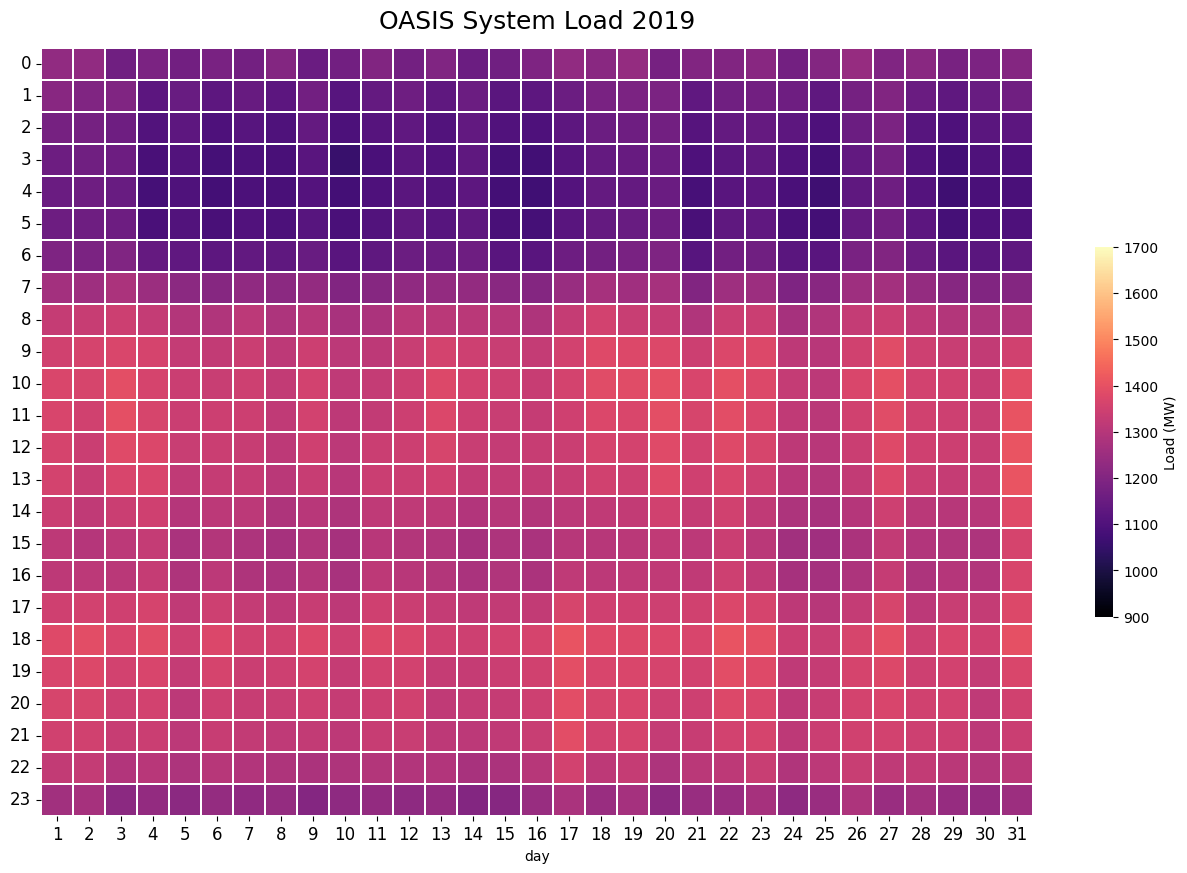

In [34]:
plot_heatmap_year(2019)

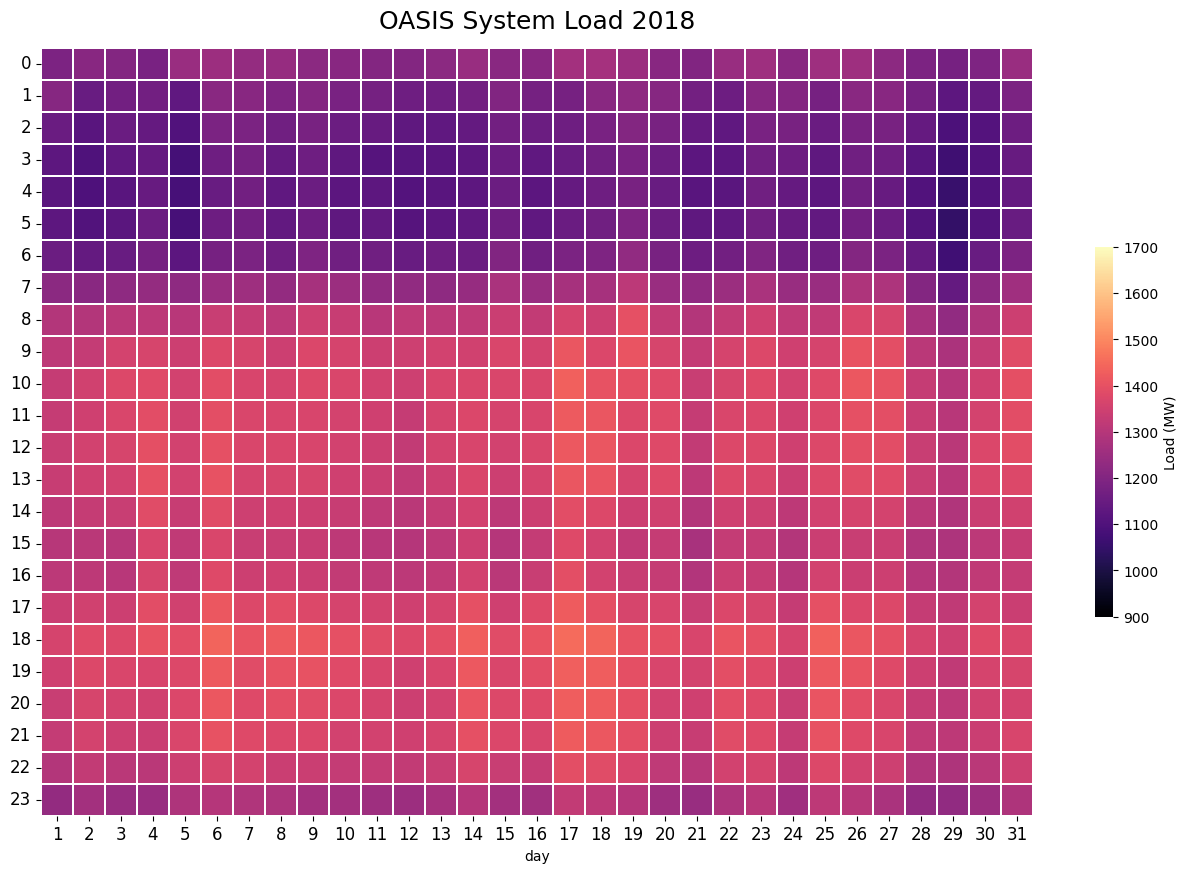

In [35]:
plot_heatmap_year(2018)

In [36]:
oasis2

datetime  load_MW
datetime                                        
2007-01-01 00:00:00 2007-01-01 00:00:00   1580.0
2007-01-01 01:00:00 2007-01-01 01:00:00   1533.0
2007-01-01 02:00:00 2007-01-01 02:00:00   1495.0
2007-01-01 03:00:00 2007-01-01 03:00:00   1446.0
2007-01-01 04:00:00 2007-01-01 04:00:00   1406.0
...                                 ...      ...
2024-12-31 19:00:00 2024-12-31 19:00:00      NaN
2024-12-31 20:00:00 2024-12-31 20:00:00      NaN
2024-12-31 21:00:00 2024-12-31 21:00:00      NaN
2024-12-31 22:00:00 2024-12-31 22:00:00      NaN
2024-12-31 23:00:00 2024-12-31 23:00:00      NaN

[157798 rows x 2 columns]

In [37]:
import matplotlib
import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np; np.random.seed(1)

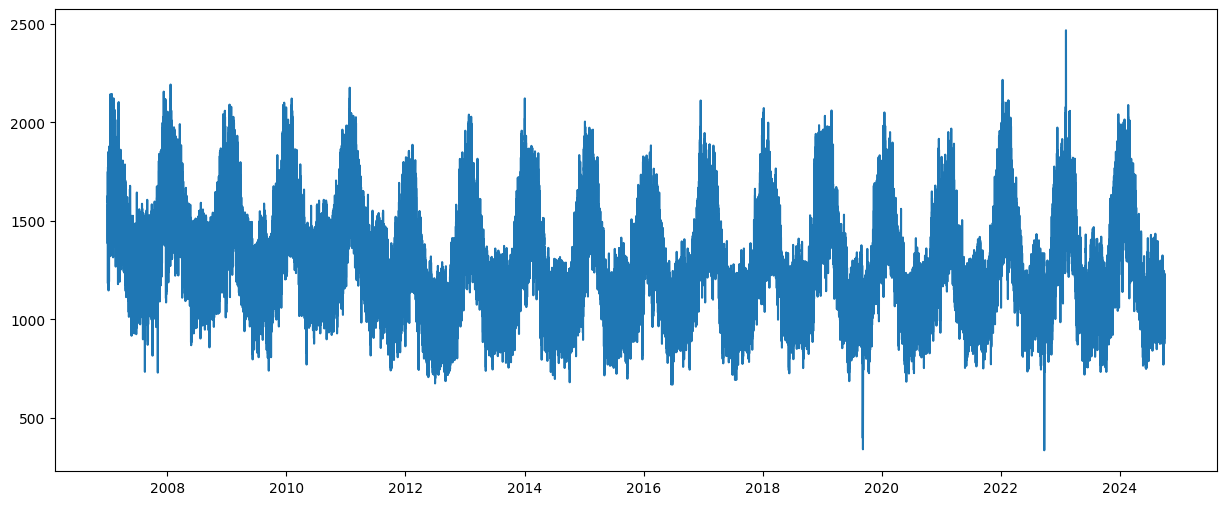

In [38]:
plt.figure(figsize=(15,6))
plt.plot(oasis2['datetime'].sort_index(), oasis2['load_MW'])

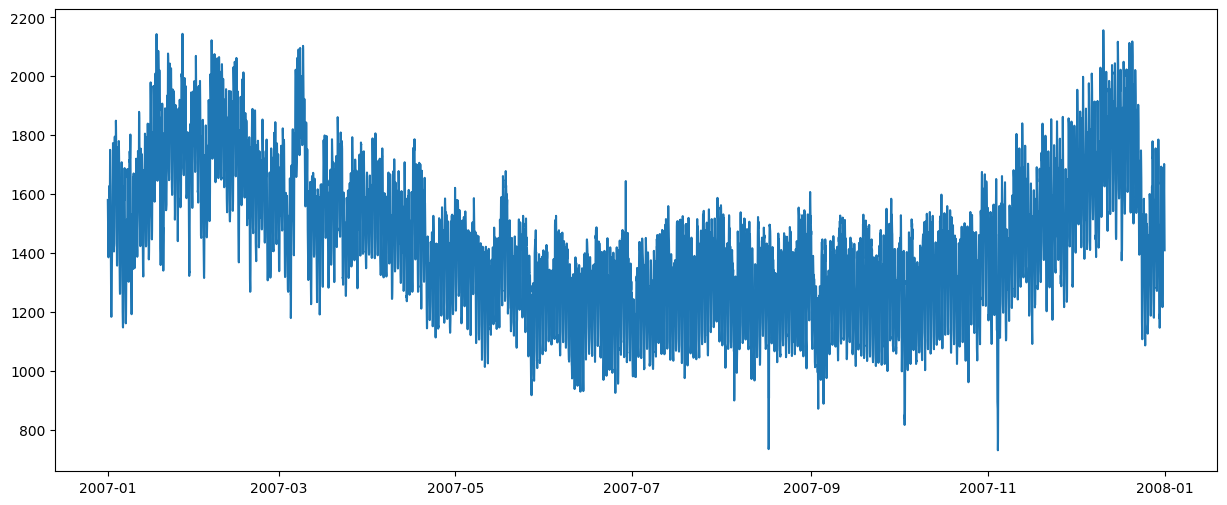

In [39]:
year1 = oasis2[oasis2['datetime'].dt.year == 2007]
plt.figure(figsize=(15,6))
plt.plot(year1['datetime'].sort_index(), year1['load_MW'])

In [40]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    #xaxisMon = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()

    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    """
    ymax = y + yerr.max()
    ymin = y - yerr.min()
    """
    ax.plot(x, y, color=color, linewidth=3)
    #plt.xticks(x,xaxisMon)
    plt.margins(0.05)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [41]:
def hourly(data):
    #Diurnal Fig 2
    diurnalm = data['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = data['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Load (MW)')
    plt.xlabel('Figure 2: Daily Variation in Average Hourly Grid Load (MW)')
    plt.tight_layout()


In [42]:
#diurnalm

In [43]:
#diurnals

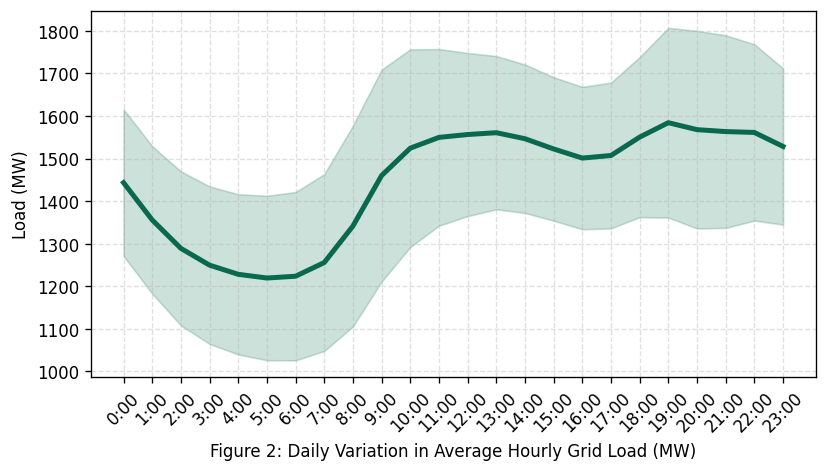

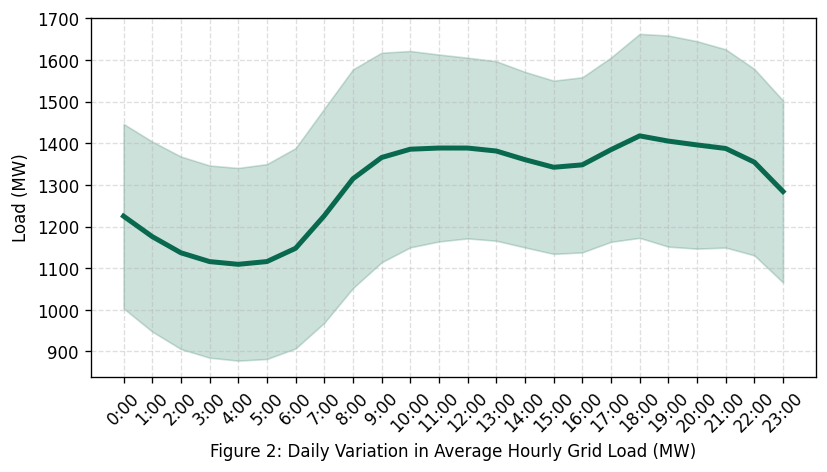

In [44]:
hourly(year1)
hourly(oasis)

In [45]:
def hourly_summer1chart(data):
    #Diurnal Fig 2
    datasummer = data[(data['datetime'].dt.month < 10) & (data['datetime'].dt.month > 3)]
    diurnalm = datasummer['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datasummer['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Load (MW)')
    plt.xlabel('Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW)')
    plt.tight_layout()

In [46]:
def hourly_winter1chart(data):
    #Diurnal Fig 2
    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Load (MW)')
    plt.xlabel('Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW)')
    plt.tight_layout()

In [47]:
def hourly_summer(data, ax):
    #Diurnal Fig 2
    datasummer = data[(data['datetime'].dt.month < 10) & (data['datetime'].dt.month > 3)]
    diurnalm = datasummer['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datasummer['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    #fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    #plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2, ax=ax)
    #plt.xticks(xaxis2b,xaxisHours, rotation=45)
    #plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    #plt.ylabel('Load (MW)')
    #plt.xlabel('Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW)')
    #plt.tight_layout()
    #return ax


In [48]:
def hourly_winter(data, ax):
    #Diurnal Fig 2
    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    #fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    #plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2,ax=ax)
    #plt.xticks(xaxis2b,xaxisHours, rotation=45)
    #plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    #plt.ylabel('Load (MW)')
    #plt.xlabel('Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW)')
    #plt.tight_layout()
    #return ax


In [49]:
hourly_df2['datetime'].dt.month

datetime
2007-01-01 00:00:00     1
2007-01-01 01:00:00     1
2007-01-01 02:00:00     1
2007-01-01 03:00:00     1
2007-01-01 04:00:00     1
                       ..
2024-12-31 19:00:00    12
2024-12-31 20:00:00    12
2024-12-31 21:00:00    12
2024-12-31 22:00:00    12
2024-12-31 23:00:00    12
Name: datetime, Length: 157798, dtype: int32

In [50]:
hourly_df2[(hourly_df2['datetime'].dt.month < 10) & (hourly_df2['datetime'].dt.month > 3)]

datetime  hour_index  load_MW
datetime                                                    
2007-04-01 00:00:00 2007-04-01 00:00:00        2160  1566.00
2007-04-01 01:00:00 2007-04-01 01:00:00        2161  1489.00
2007-04-01 02:00:00 2007-04-01 02:00:00        2162  1436.00
2007-04-01 03:00:00 2007-04-01 03:00:00        2163  1409.00
2007-04-01 04:00:00 2007-04-01 04:00:00        2164  1397.00
...                                 ...         ...      ...
2024-09-30 19:00:00 2024-09-30 19:00:00        6570  1220.27
2024-09-30 20:00:00 2024-09-30 20:00:00        6571  1232.36
2024-09-30 21:00:00 2024-09-30 21:00:00        6572  1191.69
2024-09-30 22:00:00 2024-09-30 22:00:00        6573  1138.80
2024-09-30 23:00:00 2024-09-30 23:00:00        6574  1029.88

[79056 rows x 3 columns]

In [51]:
hourly_df2[(hourly_df2['datetime'].dt.month <= 3) & (hourly_df2['datetime'].dt.month >= 1) | (hourly_df2['datetime'].dt.month <= 12) & (hourly_df2['datetime'].dt.month >= 10)]

datetime  hour_index  load_MW
datetime                                                    
2007-01-01 00:00:00 2007-01-01 00:00:00           1   1580.0
2007-01-01 01:00:00 2007-01-01 01:00:00           2   1533.0
2007-01-01 02:00:00 2007-01-01 02:00:00           3   1495.0
2007-01-01 03:00:00 2007-01-01 03:00:00           4   1446.0
2007-01-01 04:00:00 2007-01-01 04:00:00           5   1406.0
...                                 ...         ...      ...
2024-12-31 19:00:00 2024-12-31 19:00:00        8779      NaN
2024-12-31 20:00:00 2024-12-31 20:00:00        8780      NaN
2024-12-31 21:00:00 2024-12-31 21:00:00        8781      NaN
2024-12-31 22:00:00 2024-12-31 22:00:00        8782      NaN
2024-12-31 23:00:00 2024-12-31 23:00:00        8783      NaN

[78742 rows x 3 columns]

In [52]:
#hourly_summer(year1)
#hourly_summer(hourly_df2)
#hourly_winter(year1)
#hourly_winter(hourly_df2)

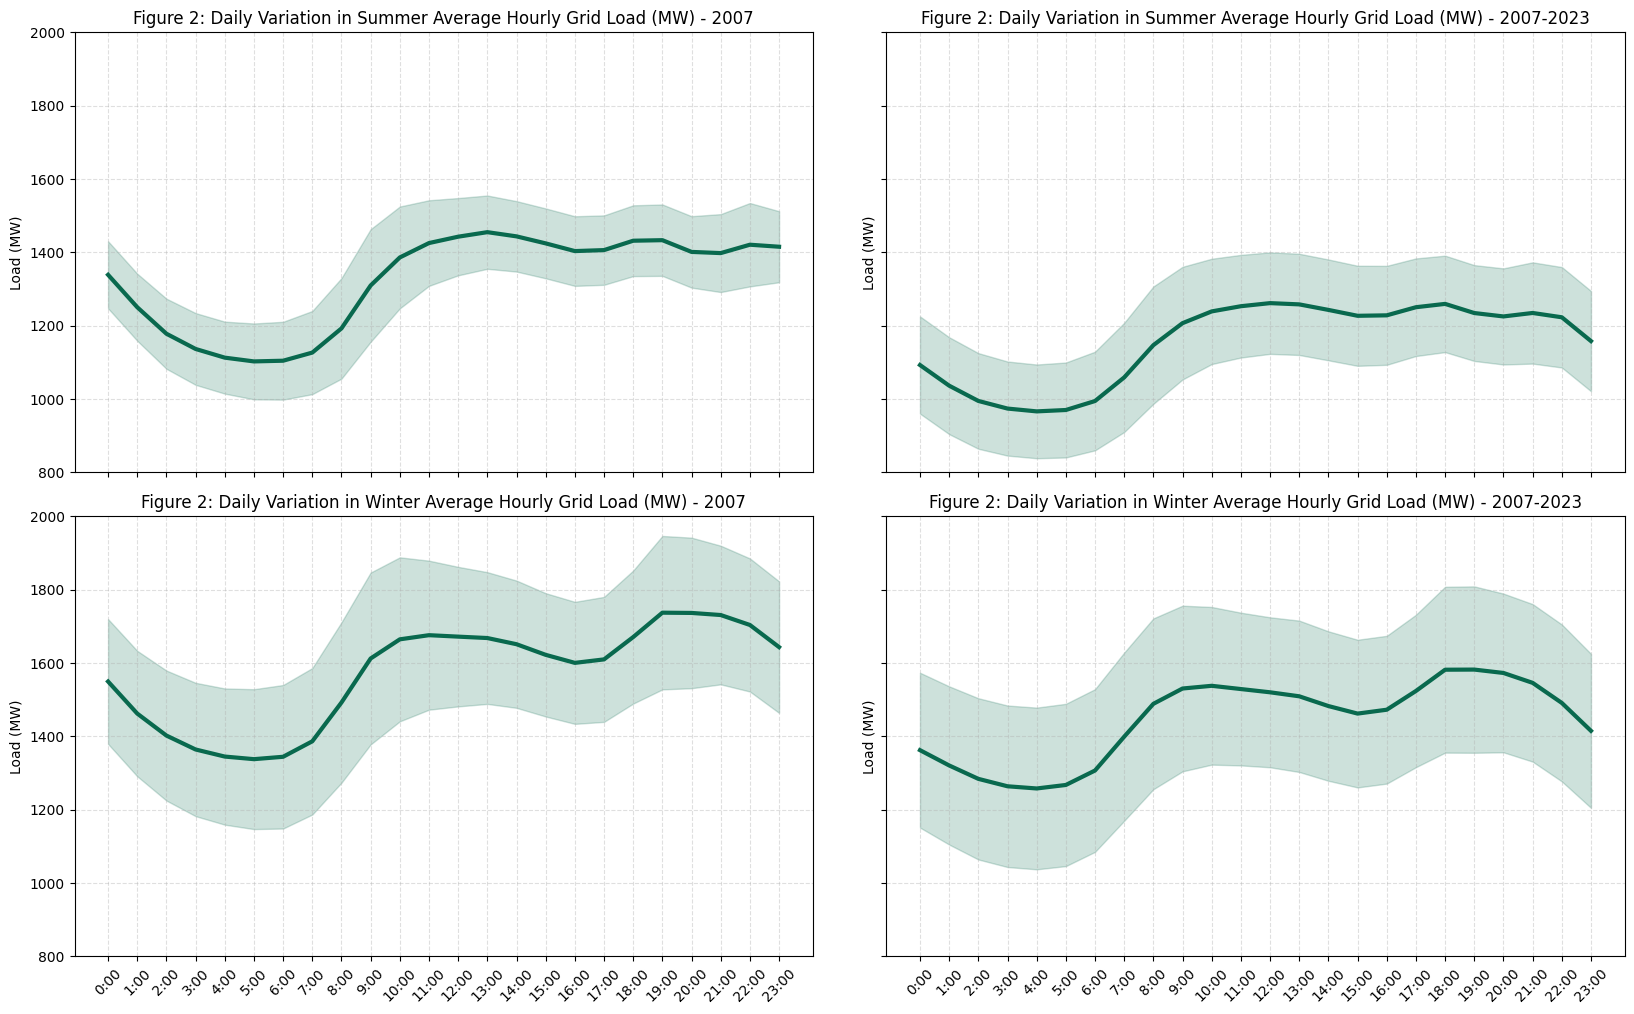

In [53]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(2, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

(ax1, ax2), (ax3, ax4) = axs
hourly_summer(year1, ax=ax1)
hourly_summer(hourly_df2,ax=ax2)
hourly_winter(year1, ax = ax3)
hourly_winter(hourly_df2, ax = ax4)

axs[0, 0].set_title("Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW) - 2007")
axs[1, 0].set_title("Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW) - 2007")
#axs[1, 0].sharex(axs[0, 0])
axs[0, 1].set_title("Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW) - 2007-2023")
axs[1, 1].set_title("Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW) - 2007-2023")
#fig.tight_layout()
xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]

for ax in axs.flat:
    ax.set(ylabel='Load (MW)')
    #hours = mdates.HourLocator(interval = 1)
    #h_fmt = mdates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_locator(hours)
    #ax.xaxis.set_major_formatter(h_fmt) 
    ax.set_xticks(xaxis2b, labels=None)
    ax.set_xticklabels(xaxisHours, rotation=45)
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
    #ax1.set_xlim([0, 5])
    ax.set_ylim([800, 2000])
    ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #ax.set_xticklabels(xaxis2b, xaxisHours, rotation=45)

#plt.savefig(fname = "figure01.png", \
#                    dpi=300,
#                    bbox_inches='tight')

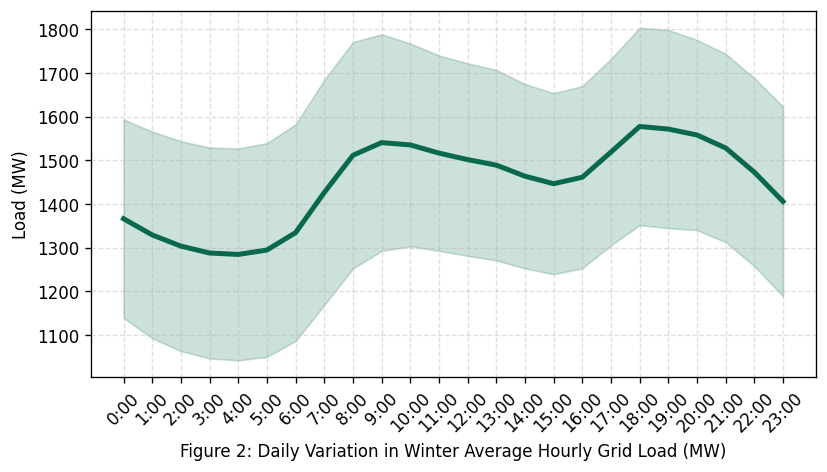

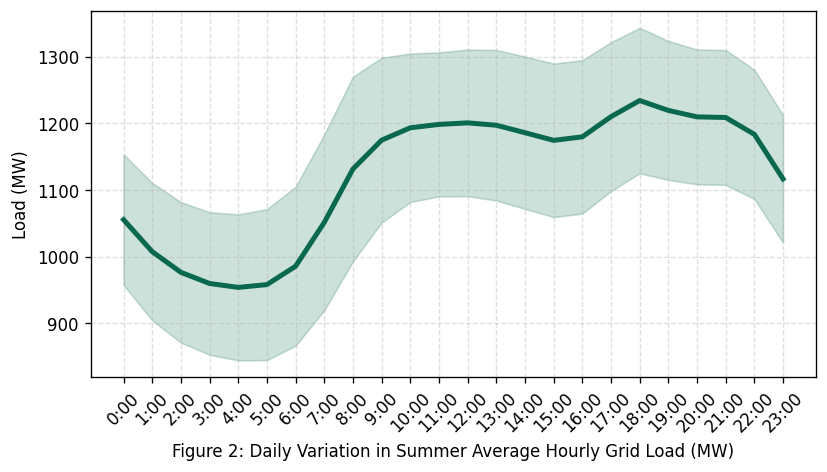

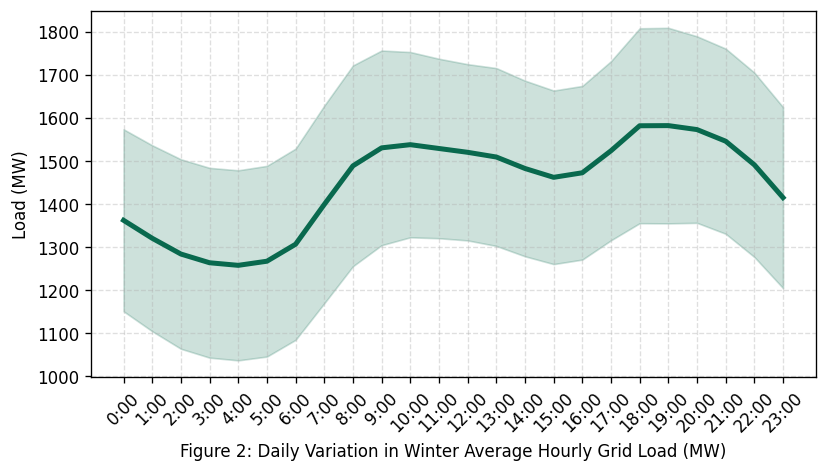

In [54]:
year2023 = oasis2[oasis2['datetime'].dt.year == 2023]
hourly_winter1chart(year2023)
hourly_summer1chart(year2023)
hourly_winter1chart(hourly_df2)

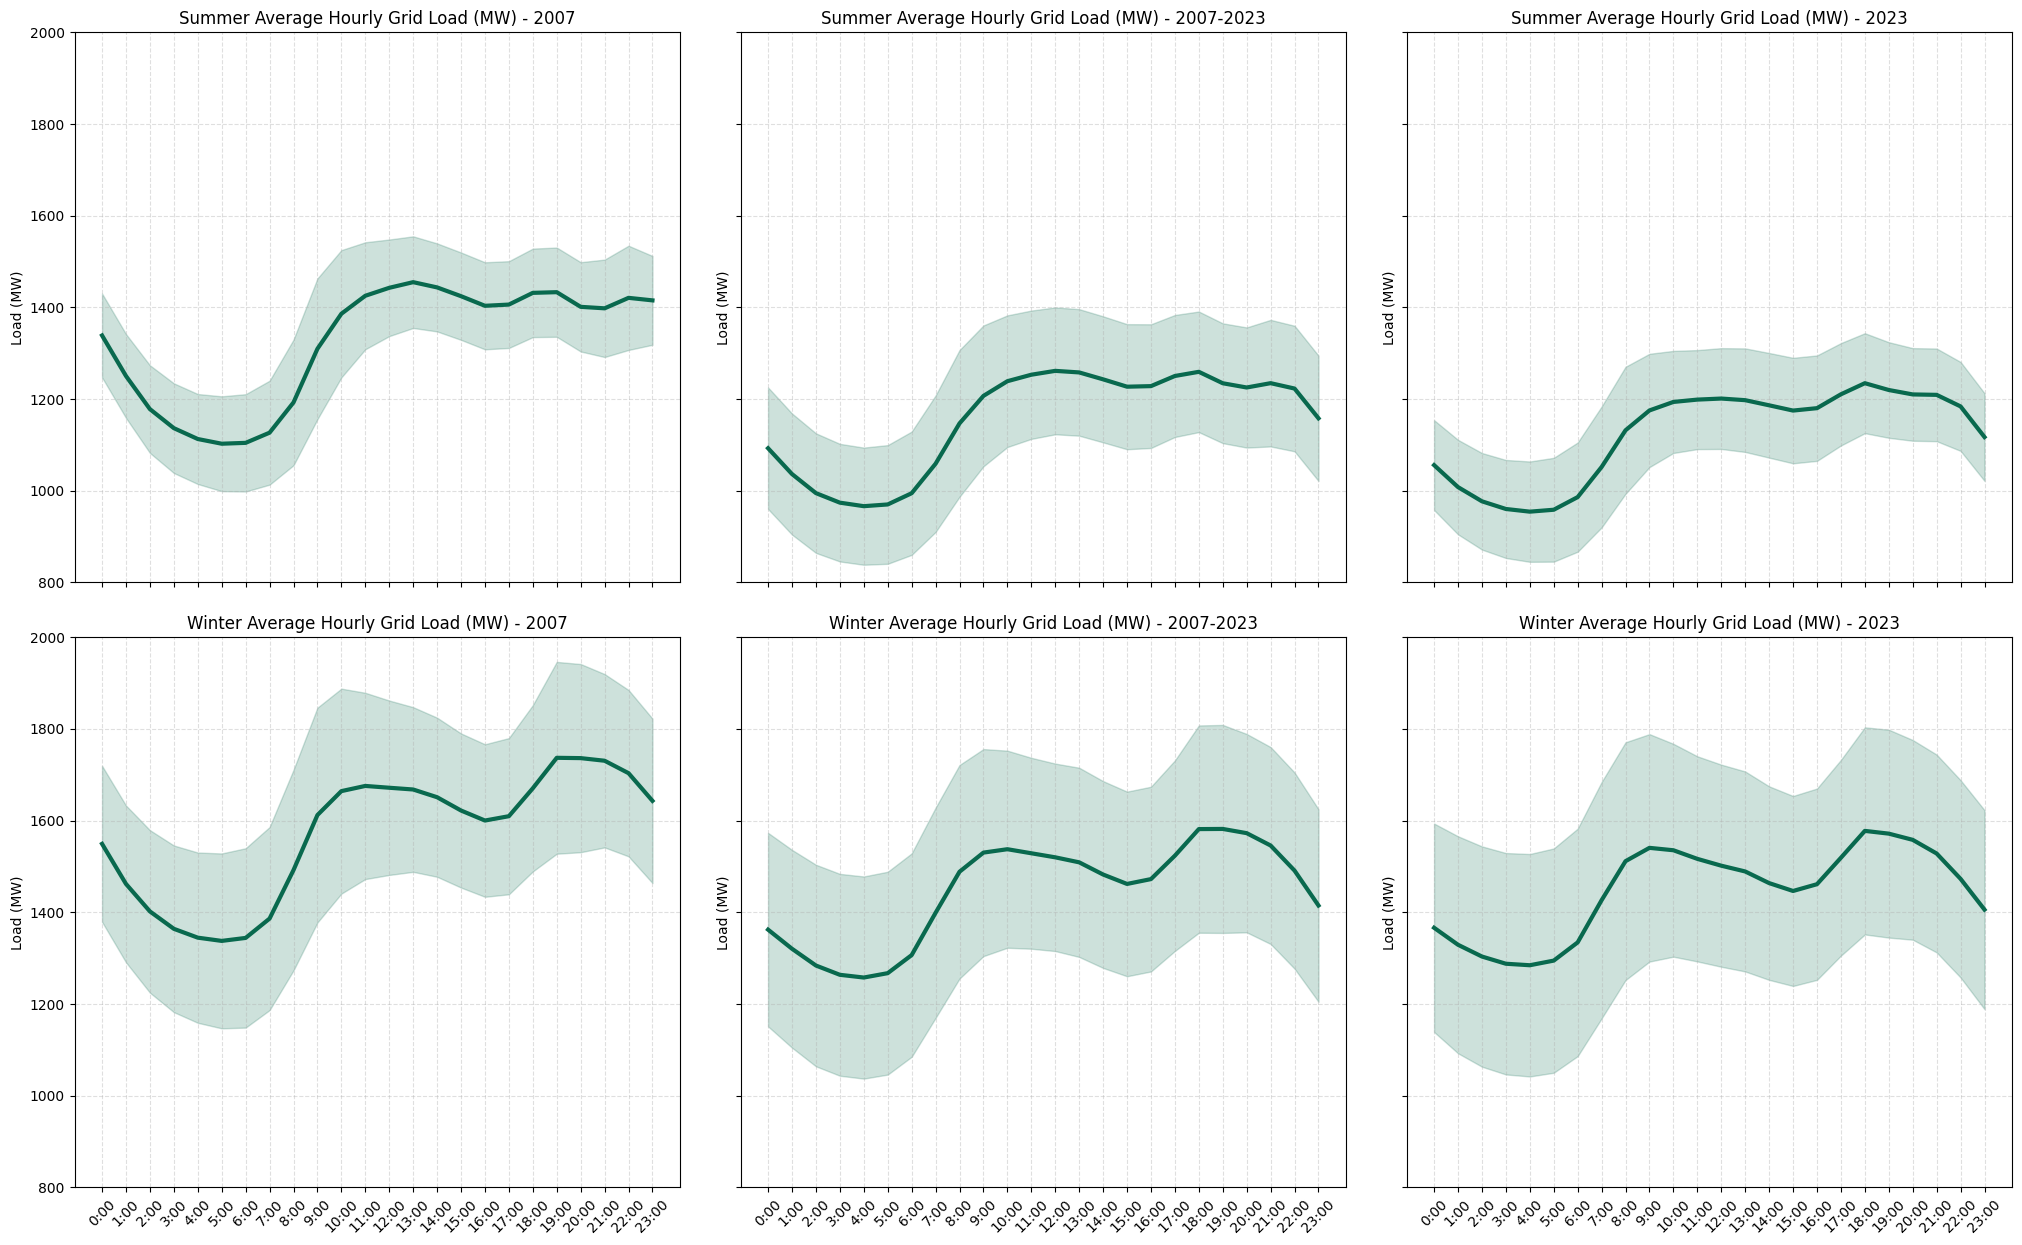

In [55]:
#import matplotlib.dates as mdates

fig, axs2 = plt.subplots(2, 3, figsize=(25,15),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

(ax1, ax2, ax5), (ax3, ax4, ax6) = axs2
hourly_summer(year1, ax=ax1)
hourly_summer(hourly_df2,ax=ax2)
hourly_winter(year1, ax = ax3)
hourly_winter(hourly_df2, ax = ax4)
hourly_summer(year2023, ax=ax5)
hourly_winter(year2023, ax = ax6)

axs2[0, 0].set_title("Summer Average Hourly Grid Load (MW) - 2007")
axs2[1, 0].set_title("Winter Average Hourly Grid Load (MW) - 2007")
#axs[1, 0].sharex(axs[0, 0])
axs2[0, 1].set_title("Summer Average Hourly Grid Load (MW) - 2007-2023")
axs2[1, 1].set_title("Winter Average Hourly Grid Load (MW) - 2007-2023")

axs2[0, 2].set_title("Summer Average Hourly Grid Load (MW) - 2023")
axs2[1, 2].set_title("Winter Average Hourly Grid Load (MW) - 2023")
#fig.tight_layout()
xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]

for ax in axs2.flat:
    ax.set(ylabel='Load (MW)')
    #hours = mdates.HourLocator(interval = 1)
    #h_fmt = mdates.DateFormatter('%H:%M')
    #ax.xaxis.set_major_locator(hours)
    #ax.xaxis.set_major_formatter(h_fmt) 
    ax.set_xticks(xaxis2b, labels=None)
    ax.set_xticklabels(xaxisHours, rotation=45)
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
    #ax1.set_xlim([0, 5])
    ax.set_ylim([800, 2000])
    ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #ax.set_xticklabels(xaxis2b, xaxisHours, rotation=45)

#plt.savefig(fname = "figure02.png", \
#                    dpi=125,
#                    bbox_inches='tight')

In [56]:
hour_abbr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
all_month_year_df = pd.pivot_table(df, values="load_MW",index=["hour"],
                                   columns=[],
                                   fill_value=0,
                                   margins=True)
named_index = [[i for i in list(all_month_year_df.index)]]
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

load_MW
0    1224.836315
1    1175.781481
2    1136.917047
3    1115.773268
4    1109.246992
5    1115.858903
6    1147.701863
7    1225.798552
8    1314.561063
9    1365.612712
10   1385.517990
11   1388.351596
12   1388.281547
13   1381.177389
14   1360.424083
15   1342.155505
16   1347.993059
17   1384.381678
18   1417.518200
19   1405.014324
20   1395.776102
21   1387.311729
22   1354.409193
23   1283.964854
All  1298.102125

In [57]:
def plot_heatmap_year2(year):
    plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="load_MW",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])
    ax = sns.heatmap(allByYear_df, cmap = 'magma',
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 6}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    #xaxis52 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
    #ax.set_xticks(xaxis52, labels=None)
    #ax.set_xticklabels([i for i in range(52)])#, rotation = 0, fontsize = 12)
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
    #ax.tick_params(rotation = 0)
    plt.title(f'OASIS System Load {year}', fontdict={'fontsize':18}, pad=14);

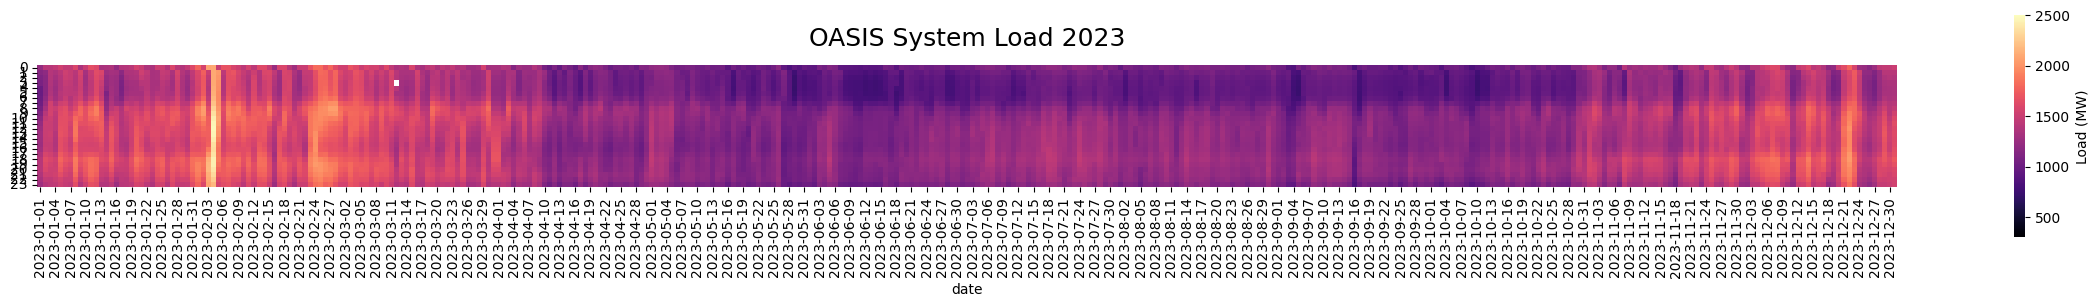

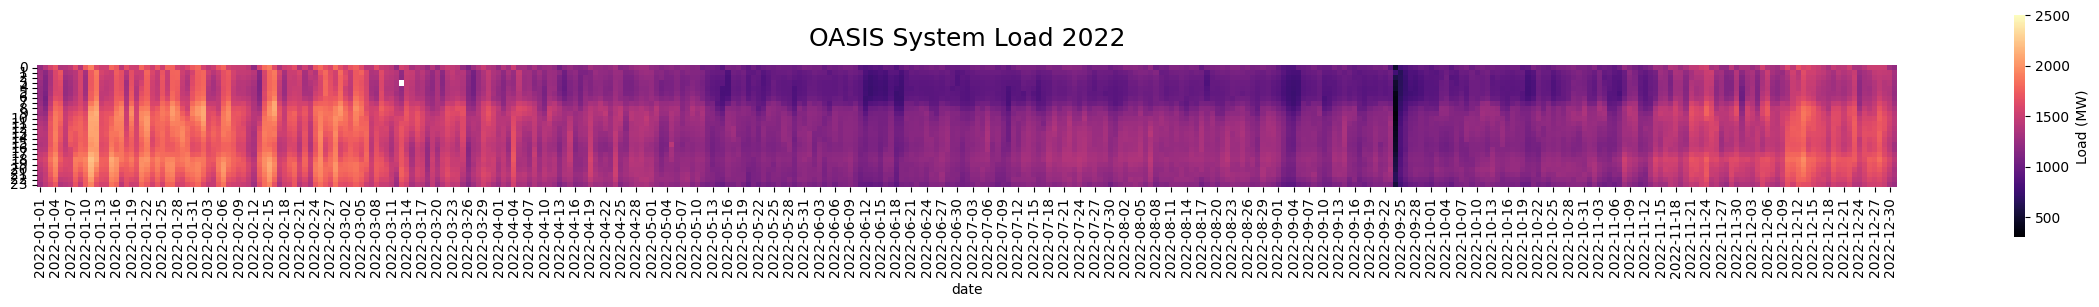

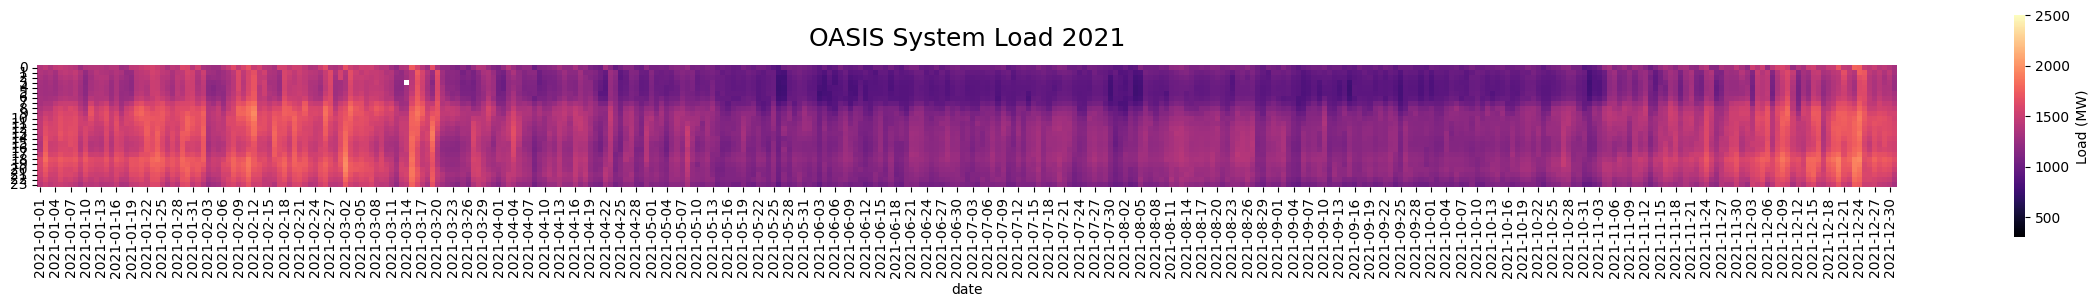

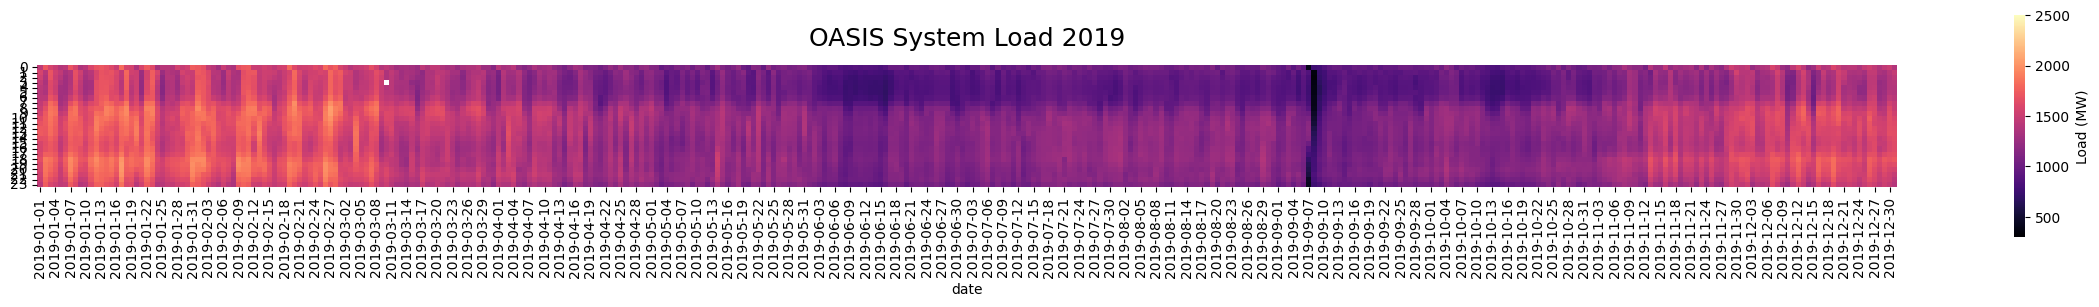

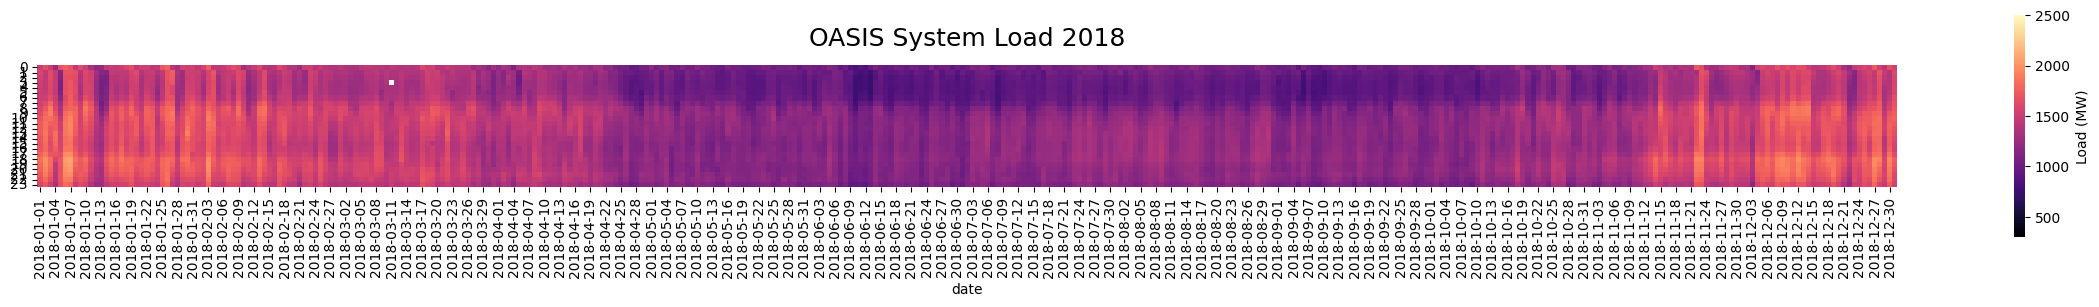

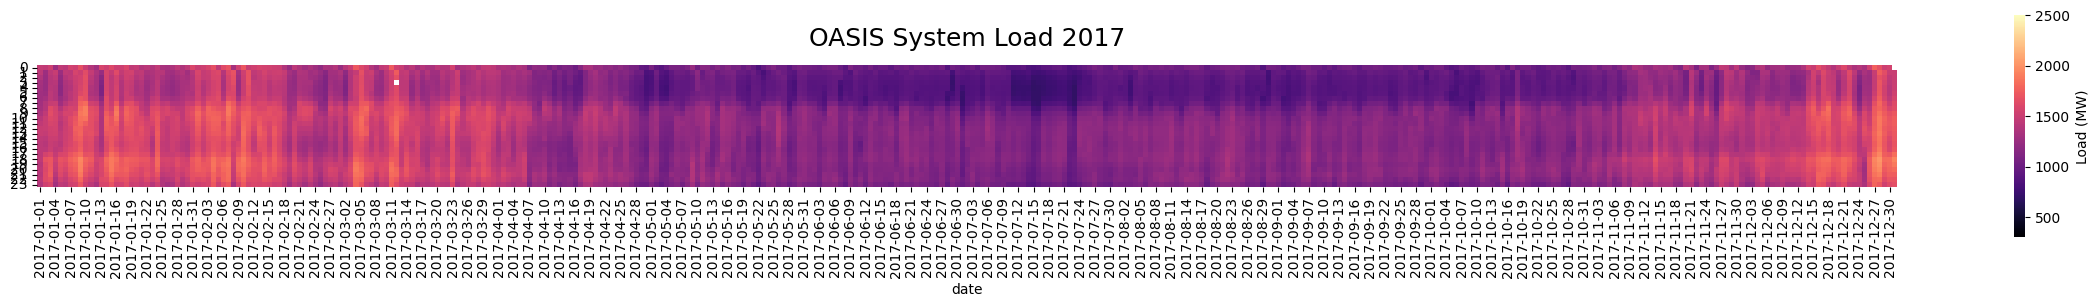

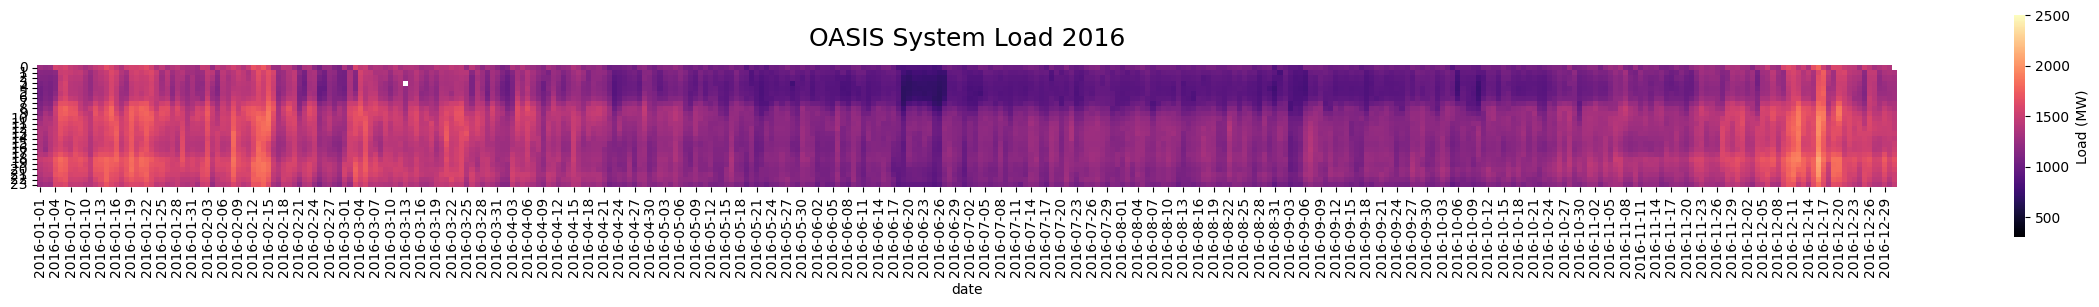

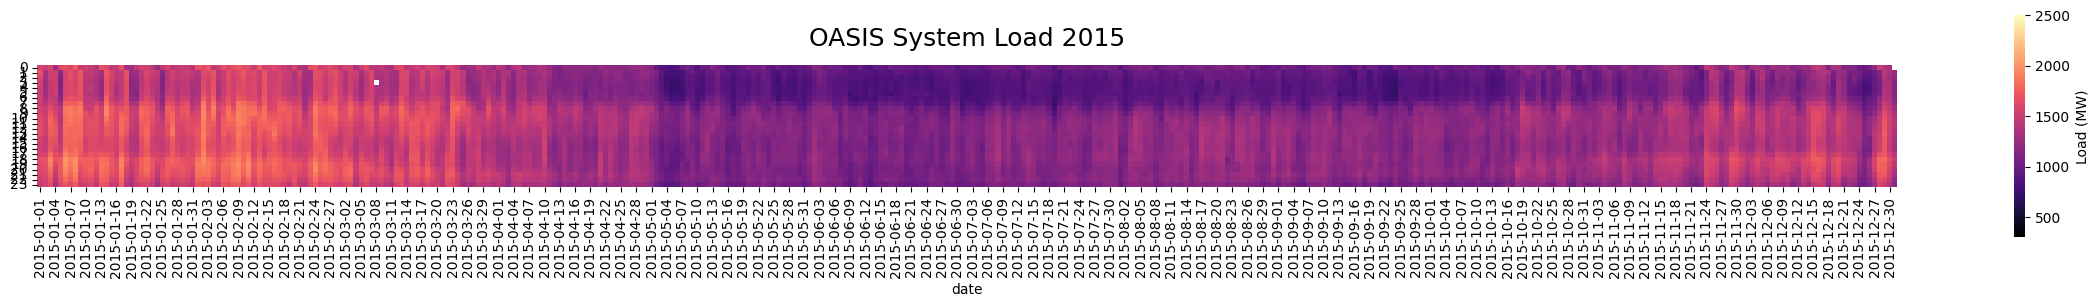

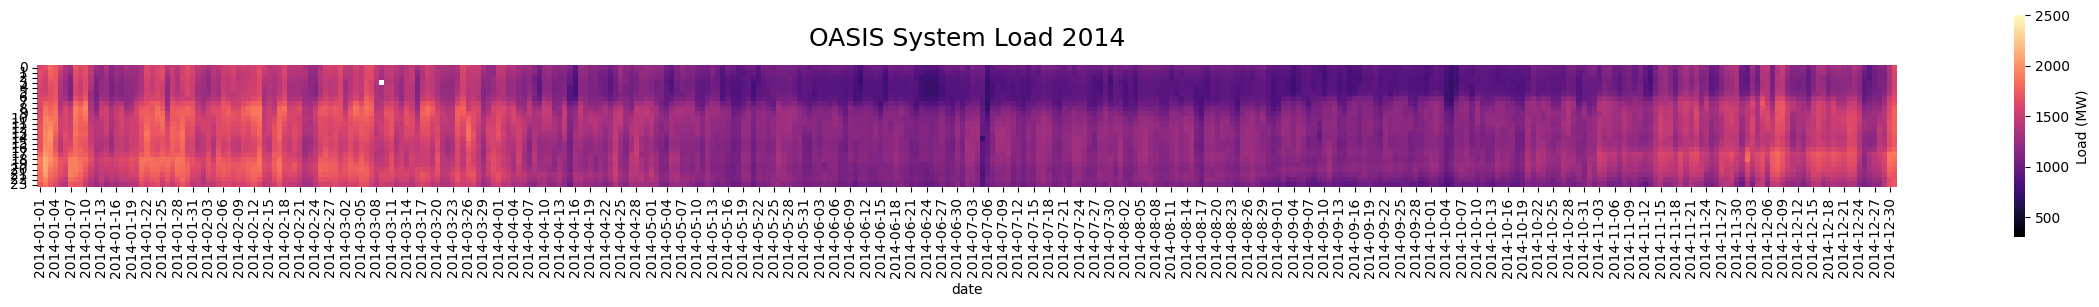

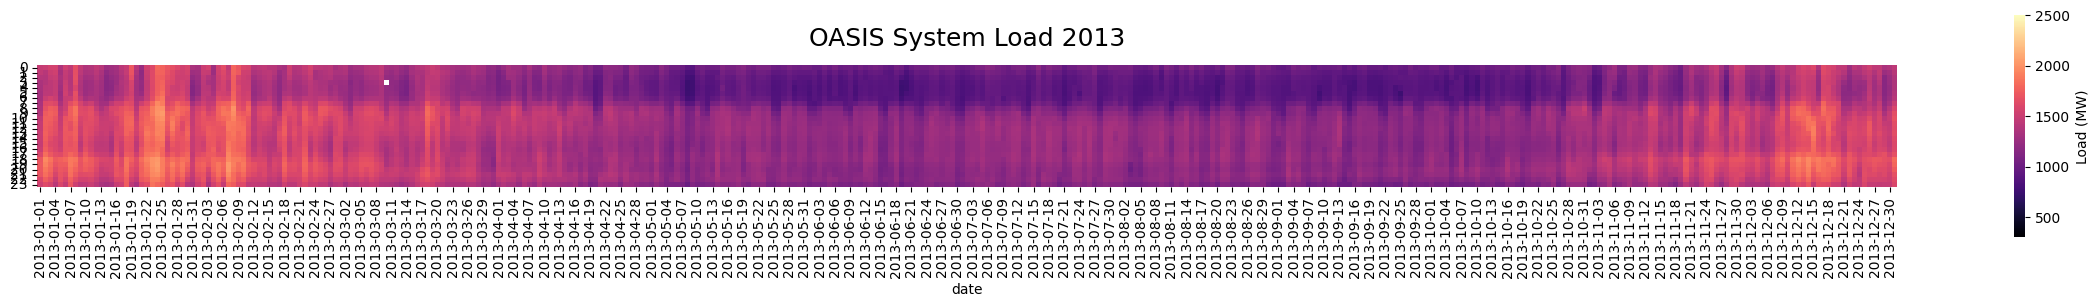

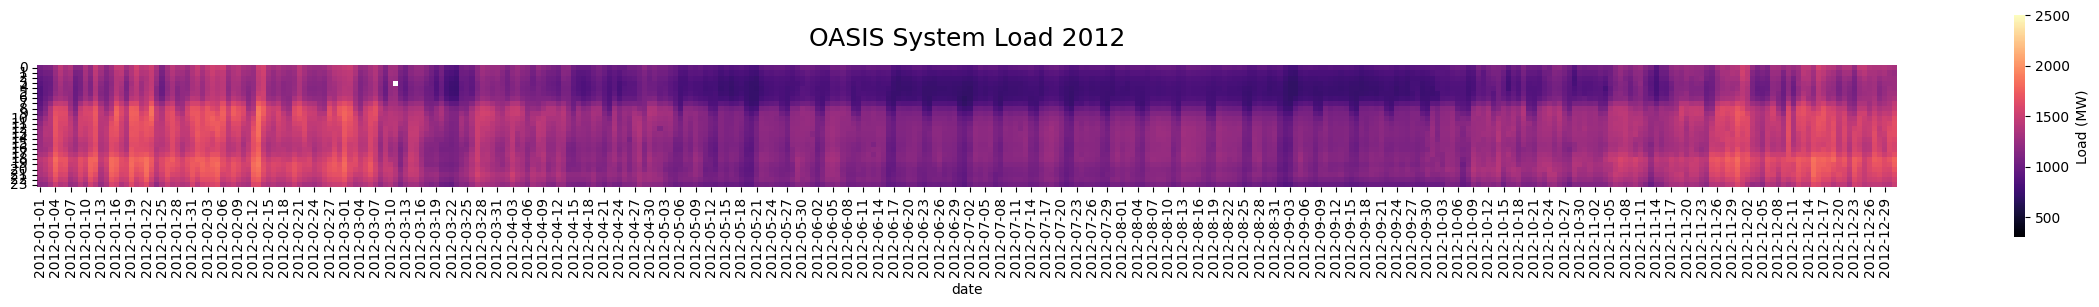

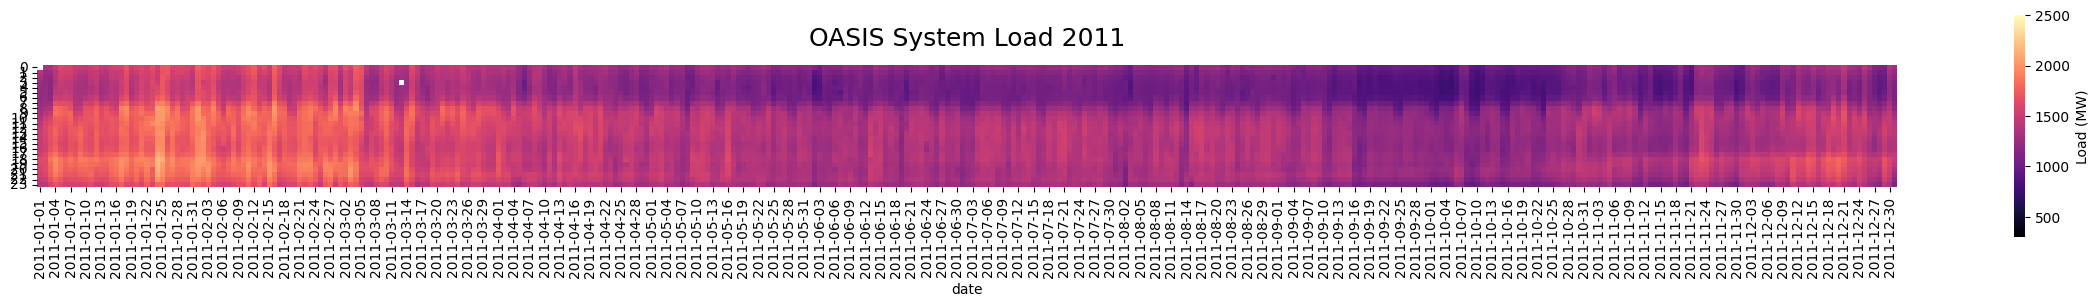

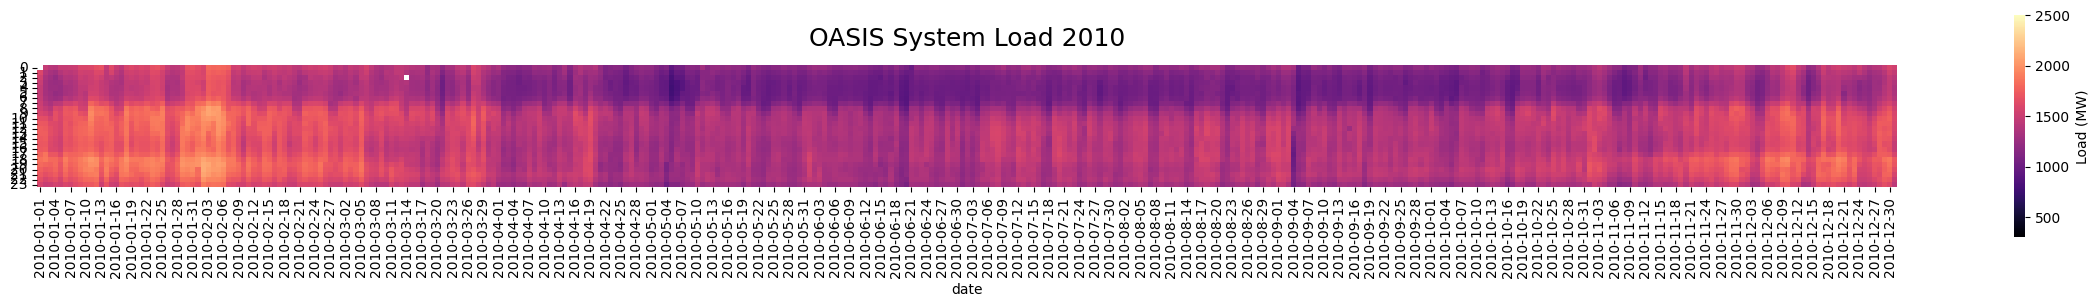

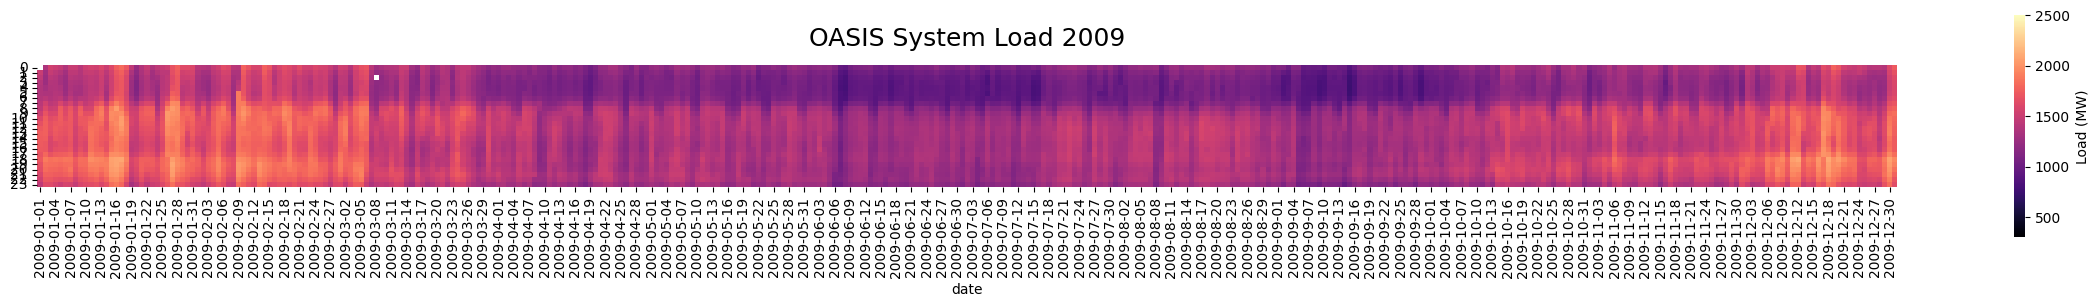

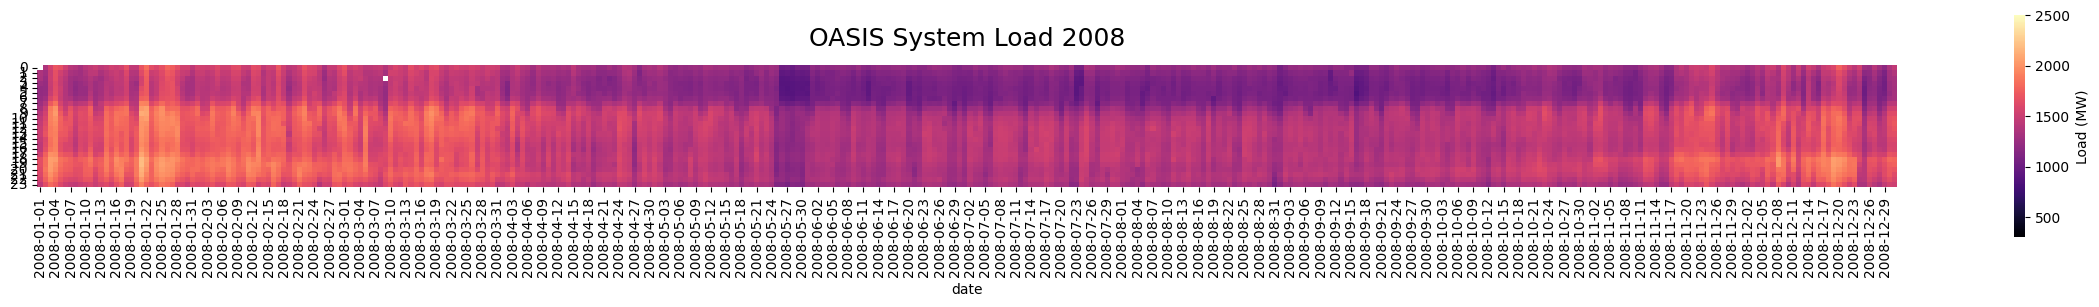

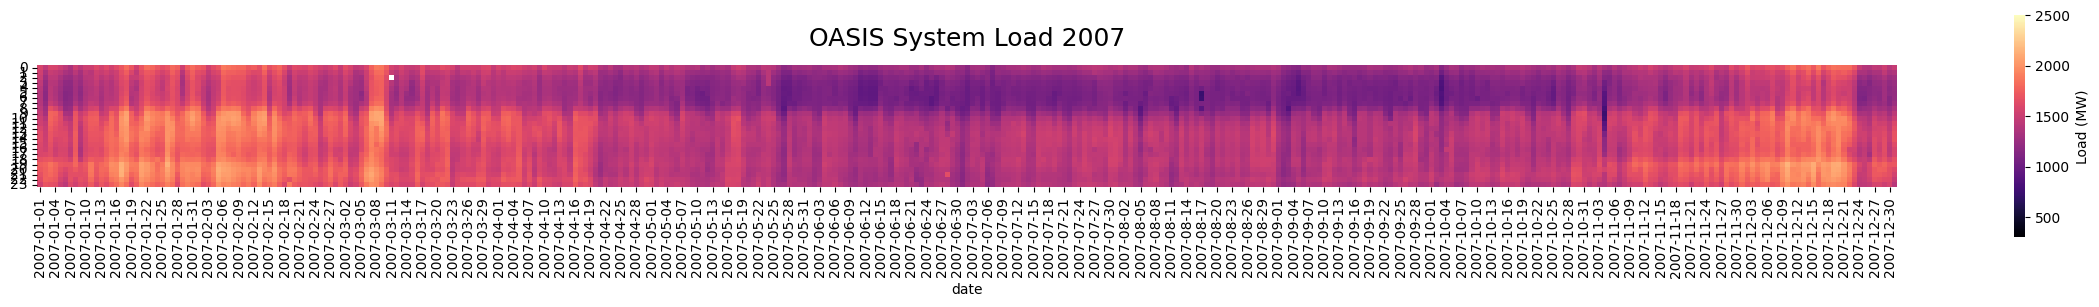

In [58]:
plot_heatmap_year2(2023)
plot_heatmap_year2(2022)
plot_heatmap_year2(2021)
plot_heatmap_year2(2019)
plot_heatmap_year2(2018)
plot_heatmap_year2(2017)
plot_heatmap_year2(2016)
plot_heatmap_year2(2015)
plot_heatmap_year2(2014)
plot_heatmap_year2(2013)
plot_heatmap_year2(2012)
plot_heatmap_year2(2011)
plot_heatmap_year2(2010)
plot_heatmap_year2(2009)
plot_heatmap_year2(2008)
plot_heatmap_year2(2007)

In [59]:
def plot_heatmap_year3(year):
    #plt.figure(figsize = (30, 6))
    allByYear_df = df.loc[df['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="load_MW",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])
    #sns.heatmap(allByYear_df, cmap = 'magma',
    #                 vmin=300, vmax=2500, #vmin=900, vmax=1700,
    #                 annot=False, linewidths=0,
    #                 annot_kws={"size": 6}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    #xaxis52 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
    #ax.set_xticks(xaxis52, labels=None)
    #ax.set_xticklabels([i for i in range(52)])#, rotation = 0, fontsize = 12)
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
    #ax.tick_params(rotation = 0)
    #plt.title(f'OASIS System Load {year}', fontdict={'fontsize':18}, pad=14);
    return allByYear_df

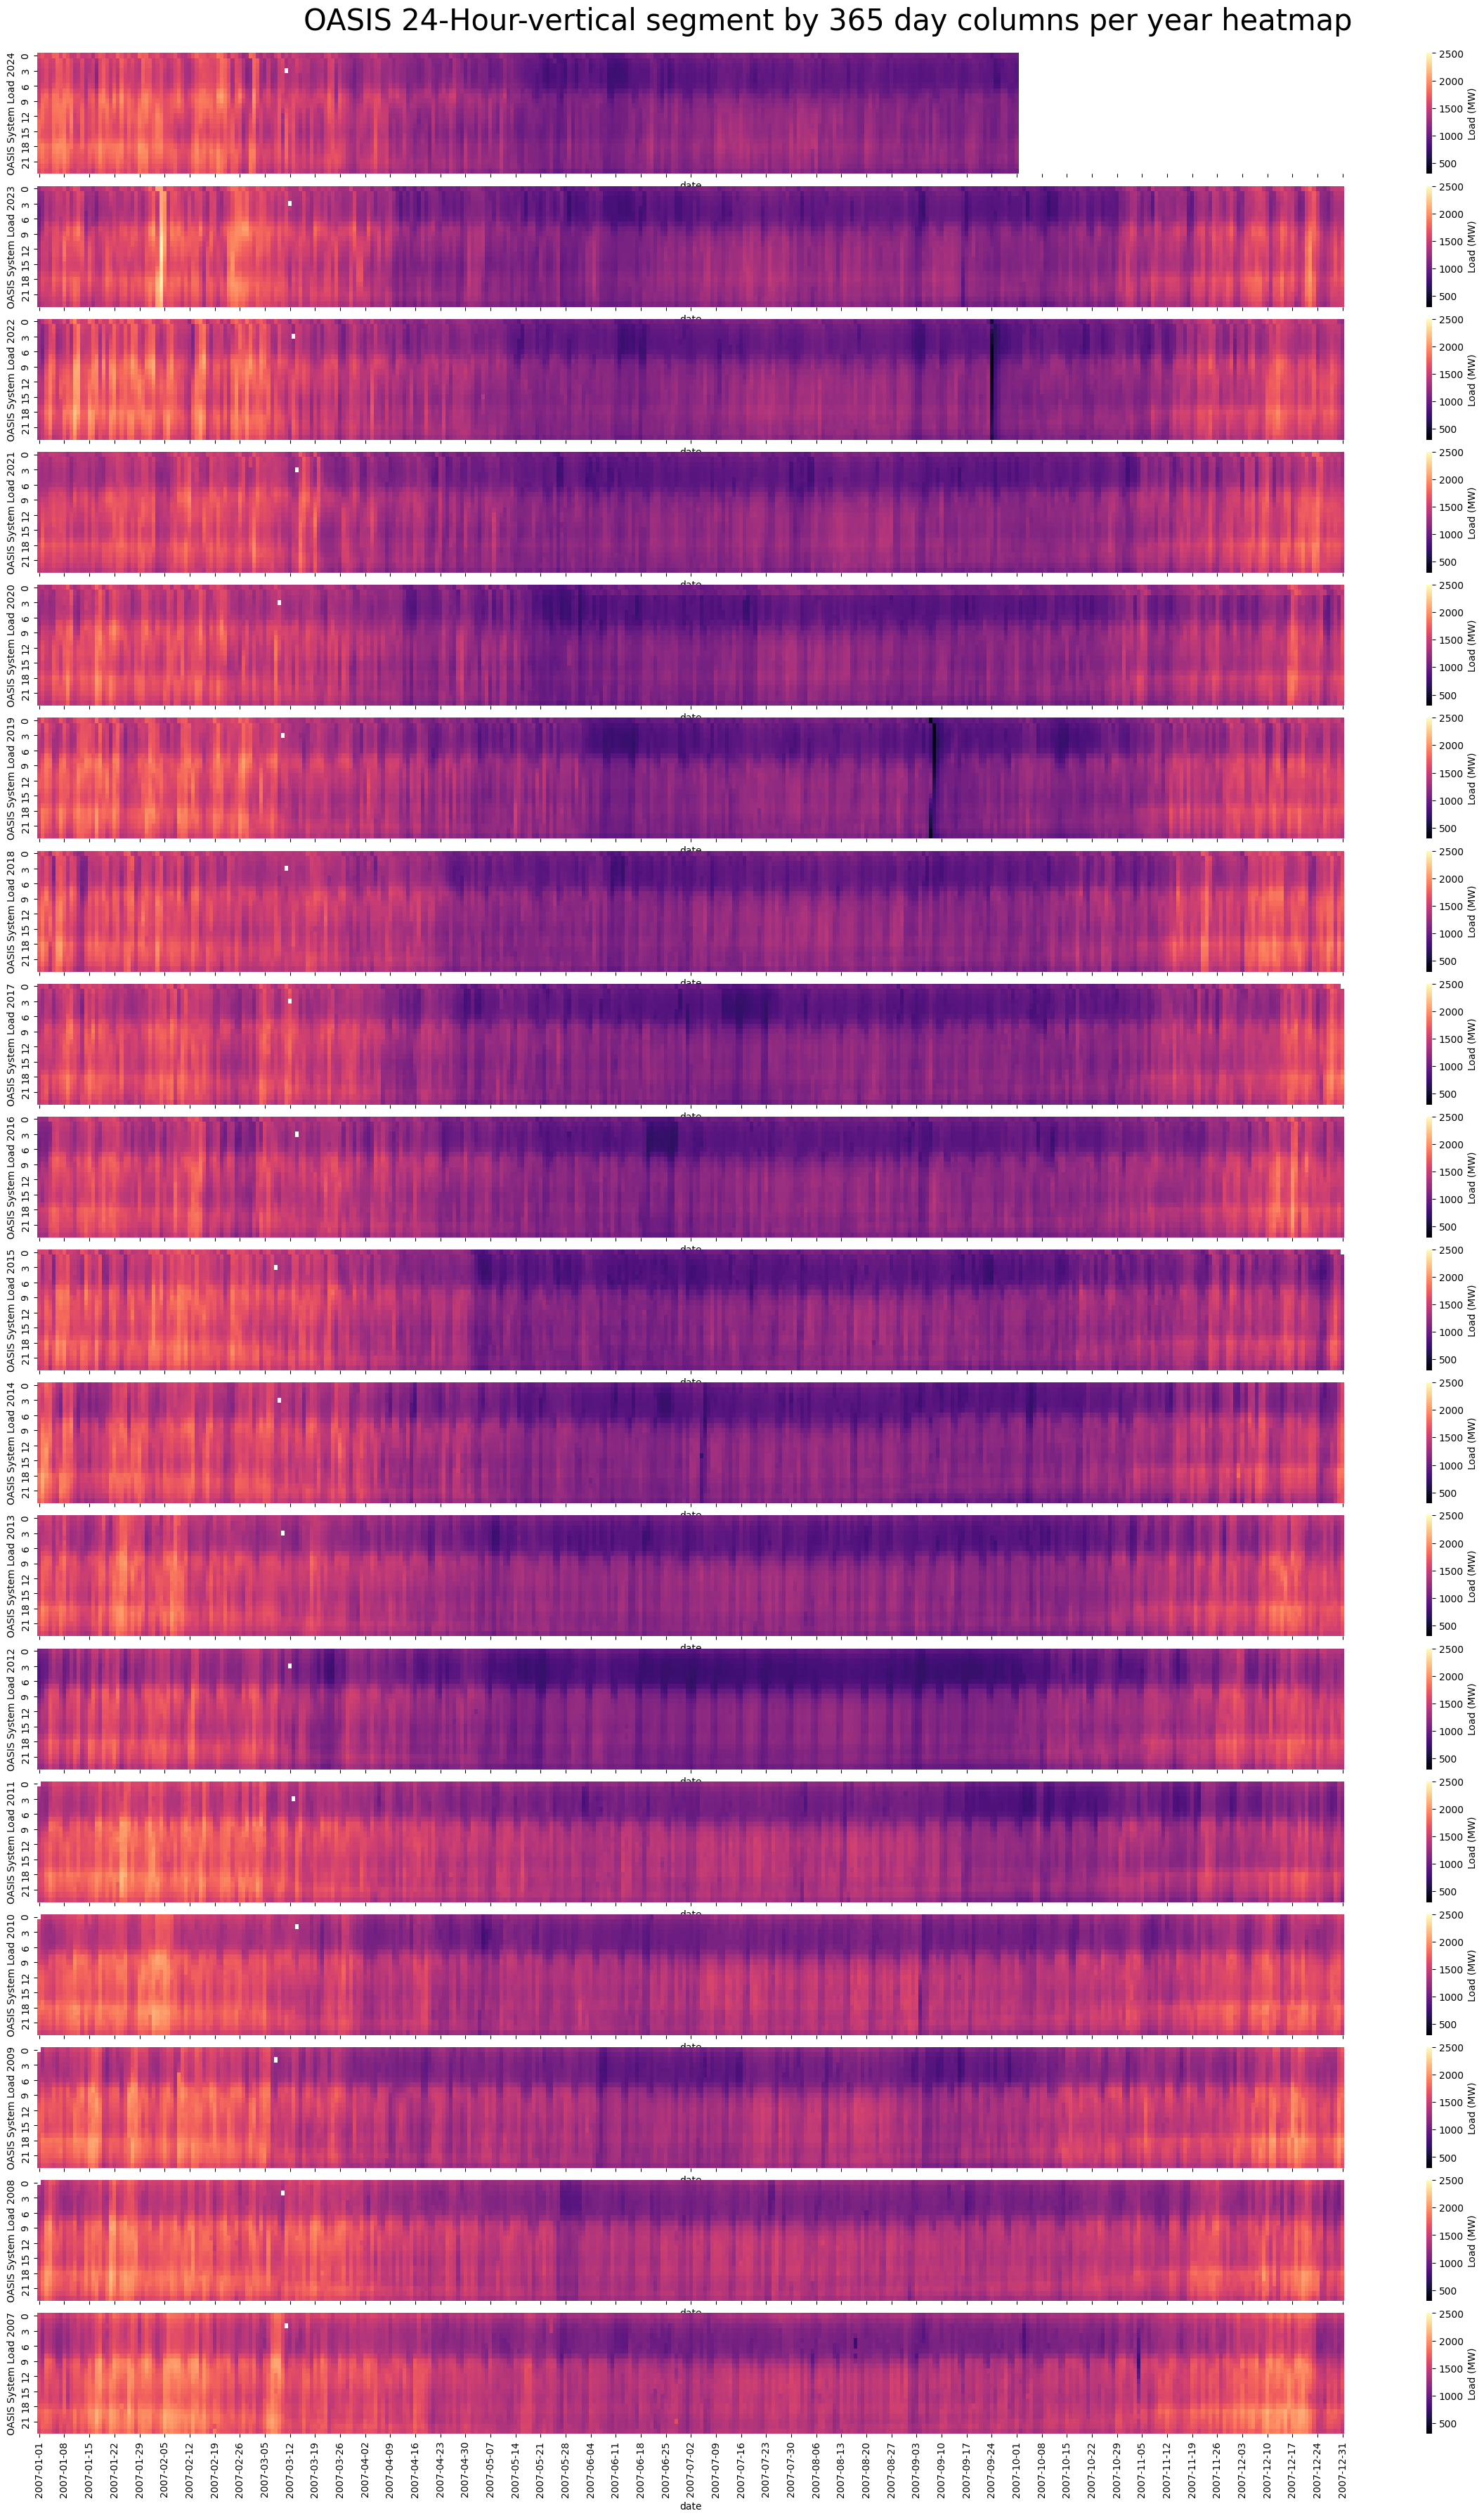

In [60]:
#date_form = mdates.DateFormatter("%b-%d")

fig, axs3 = plt.subplots(18, figsize=(30,44),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('OASIS 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=30)

#(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17) = axs3
#plot_heatmap_year3(2023)#, ax=ax1)
#plot_heatmap_year3(2022)#, ax=ax2)

sns.heatmap(ax=axs3[0], data=plot_heatmap_year3(2024), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[1], data=plot_heatmap_year3(2023), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[2], data=plot_heatmap_year3(2022), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})
                     #annot_kws={"size": 2}, square=True, cbar_kws={"shrink": .48, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[3], data=plot_heatmap_year3(2021), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[4], data=plot_heatmap_year3(2020), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[5], data=plot_heatmap_year3(2019), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[6], data=plot_heatmap_year3(2018), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[7], data=plot_heatmap_year3(2017), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[8], data=plot_heatmap_year3(2016), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[9], data=plot_heatmap_year3(2015), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[10], data=plot_heatmap_year3(2014), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[11], data=plot_heatmap_year3(2013), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[12], data=plot_heatmap_year3(2012), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[13], data=plot_heatmap_year3(2011), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[14], data=plot_heatmap_year3(2010), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[15], data=plot_heatmap_year3(2009), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[16], data=plot_heatmap_year3(2008), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

sns.heatmap(ax=axs3[17], data=plot_heatmap_year3(2007), cmap = 'magma', xticklabels=7,
                     vmin=300, vmax=2500, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Load (MW)'})

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))

#axs3.xaxis.set_minor_formatter(date_form)

#iris = sns.load_dataset("iris")

#sns.boxplot(ax=axes[0, 0], data=iris, x='species', y='petal_width')
#sns.boxplot(ax=axes[0, 1], data=iris, x='species', y='petal_length')
#sns.boxplot(ax=axes[0, 2], data=iris, x='species', y='sepal_width')
#sns.boxplot(ax=axes[1, 0], data=iris, x='species', y='sepal_length')
#sns.boxplot(ax=axes[1, 1], data=iris, x='species', y='petal_width')
#sns.boxplot(ax=axes[1, 2], data=iris, x='species', y='petal_length')

yearlist = [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

for year, ax in enumerate(axs3.flat):
    ax.set(ylabel=f'OASIS System Load {yearlist[year]}')#, title='OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')
    #ax.format_xdata = date_form
    #ax.xaxis.set_minor_locator(date_form)
    #ax.xaxis.set_minor_formatter(date_form)
    #xaxis8760 = [i for i in range(8760)]
    #ax.set_xticks(xaxis8760, labels=None)
    #ax.set_xticklabels(xaxis8760)
#    ax.set_xticks(xaxis2b, labels=None)
#    ax.set_xticklabels(xaxisHours, rotation=45)
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
#    #ax1.set_xlim([0, 5])
#    ax.set_ylim([800, 2000])
#    ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)

plt.savefig(fname = "figure03a.png", \
                    dpi=125,
                    bbox_inches='tight')

In [61]:
#big_df = pd.read_parquet('./big_dfnsdup.parquet')
big_df = pd.read_parquet('big_dfnsdup13col07_24.parquet')

In [62]:
big_df.describe()

winds         windd        preint        prepro          temp  \
count  3.133791e+07  3.112280e+07  2.239349e+07  2.239349e+07  3.155734e+07   
mean   4.045149e+00  2.053378e+02  2.662970e-01  1.495817e-01  7.128930e+00   
std    2.749611e+00  9.701167e+01  2.142414e+00  3.096712e-01  9.321096e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -6.052000e+01   
25%    2.060000e+00  1.400000e+02  0.000000e+00  0.000000e+00  2.000000e-01   
50%    3.510000e+00  2.210000e+02  0.000000e+00  0.000000e+00  7.180000e+00   
75%    5.430000e+00  2.820000e+02  3.520000e-02  6.000000e-02  1.467000e+01   
max    4.013000e+01  3.590000e+02  1.000000e+02  1.000000e+00  5.684000e+01   

              humid         cloud         press           dew           lat  \
count  3.138371e+07  1.604287e+07  3.037669e+07  3.140345e+07  3.158551e+07   
mean   8.113367e-01  6.759129e-01  1.014384e+03  3.840286e+00  4.518532e+01   
std    1.500235e-01  3.480745e-01  9.695558e+00  9.425747e+00  7.753329e-01   
min    0.000000e+00  0.000000e+00  9.412000e+02 -6.529000e+01  4.345281e+01   
25%    7.200000e-01  4.300000e-01  1.008900e+03 -2.890000e+00  4.465282e+01   
50%    8.400000e-01  7.500000e-01  1.014900e+03  4.090000e+00  4.525282e+01   
75%    9.300000e-01  1.000000e+00  1.020800e+03  1.171000e+01  4.565282e+01   
max    1.000000e+00  1.000000e+00  1.062500e+03  2.870000e+01  4.705282e+01   

               long  
count  3.158551e+07  
mean  -6.322063e+01  
std    1.814310e+00  
min   -6.650085e+01  
25%   -6.470085e+01  
50%   -6.350085e+01  
75%   -6.150085e+01  
max   -5.970085e+01

In [63]:
big_df.head()

time  winds  windd  preint  prepro pretyp  temp  \
21202300 2007-01-01 00:00:00+00:00   6.82  330.0     NaN     NaN    NaN -6.69   
21202301 2007-01-01 01:00:00+00:00   6.28  337.0     NaN     NaN    NaN -6.36   
21202302 2007-01-01 02:00:00+00:00   7.29  333.0     NaN     NaN    NaN -6.36   
21202303 2007-01-01 03:00:00+00:00   6.71  339.0     NaN     NaN    NaN -6.36   
21202304 2007-01-01 04:00:00+00:00   6.91  343.0     NaN     NaN    NaN -6.22   

          humid  cloud        press    dew       lat      long  
21202300   0.67    NaN  1018.799988 -11.71  46.85282 -60.30085  
21202301   0.66    NaN  1019.799988 -11.71  46.85282 -60.30085  
21202302   0.67    NaN  1020.200012 -11.42  46.85282 -60.30085  
21202303   0.69    NaN  1020.599976 -11.04  46.85282 -60.30085  
21202304   0.69    NaN  1021.099976 -11.04  46.85282 -60.30085

In [64]:
big_df['temp'].describe().apply(lambda x: format(x, 'f'))

count    31557338.000000
mean            7.128930
std             9.321096
min           -60.520000
25%             0.200000
50%             7.180000
75%            14.670000
max            56.840000
Name: temp, dtype: object

In [65]:
df1 = pd.read_csv("cwa_230_region_5precision_NS_latlong.csv")
print(df1.head())

   id       lat      long
0   1  47.05282 -60.50085
1   2  47.05282 -60.30085
2   3  46.85282 -60.70085
3   4  46.85282 -60.50085
4   5  46.85282 -60.30085


<Axes: ylabel='Frequency'>

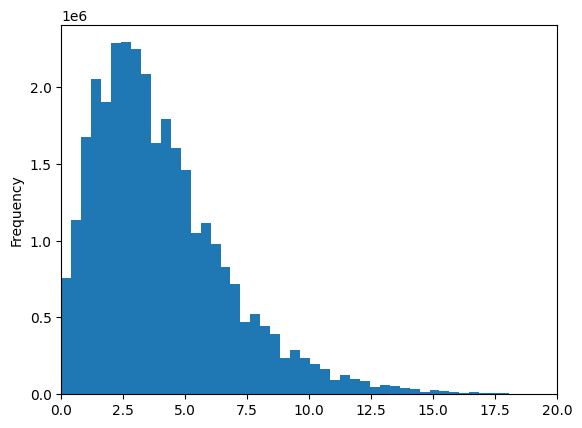

In [66]:
var4 = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)] #.groupby(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.date)['winds'].mean()
#values = pd.Series(big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['temp'], index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))
#values2 = pd.Series(var2, index = big_df[(big_df['lat'] == 47.05282) & (big_df['long'] == -60.30085)]['time'].dt.tz_localize(tz=None))
#values2
#var4['winds'].hist()
#var4['winds'].max()
big_df['winds'].max()
big_df['winds'].plot.hist(bins=100, xlim=(0,20))

In [67]:
var4a = var4.copy()
var4a['hour'] = var4a.time.dt.hour
var4a['month'] = var4a.time.dt.month
var4a['year'] = var4a.time.dt.year
var4a['day'] = var4a.time.dt.day
var4a['date'] = var4a.time.dt.date
var4a['weekdayName'] = var4a.time.dt.day_name() # df.date.dt.weekday_name on older Pandas
var4a['weekday'] = var4a.time.dt.weekday
#df['week'] = df.datetime.dt.week
var4a['weekend'] = var4a.time.dt.weekday // 5 == 1

In [68]:
def plot_heatmap_year4(year):
    plt.figure(figsize = (30, 6))
    allByYear_df = var4a.loc[var4a['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values="winds",
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])
    ax = sns.heatmap(allByYear_df, cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22, #vmin=900, vmax=1700,
                     annot=False, linewidths=0,
                     annot_kws={"size": 6}, square=True, cbar_kws={"shrink": .48, 'label': 'Wind Speed (m/s)'})
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    #xaxis52 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
    #ax.set_xticks(xaxis52, labels=None)
    #ax.set_xticklabels([i for i in range(52)])#, rotation = 0, fontsize = 12)
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
    #ax.tick_params(rotation = 0)
    plt.title(f'Darksky Hourly Wind Speed {year}', fontdict={'fontsize':18}, pad=14);

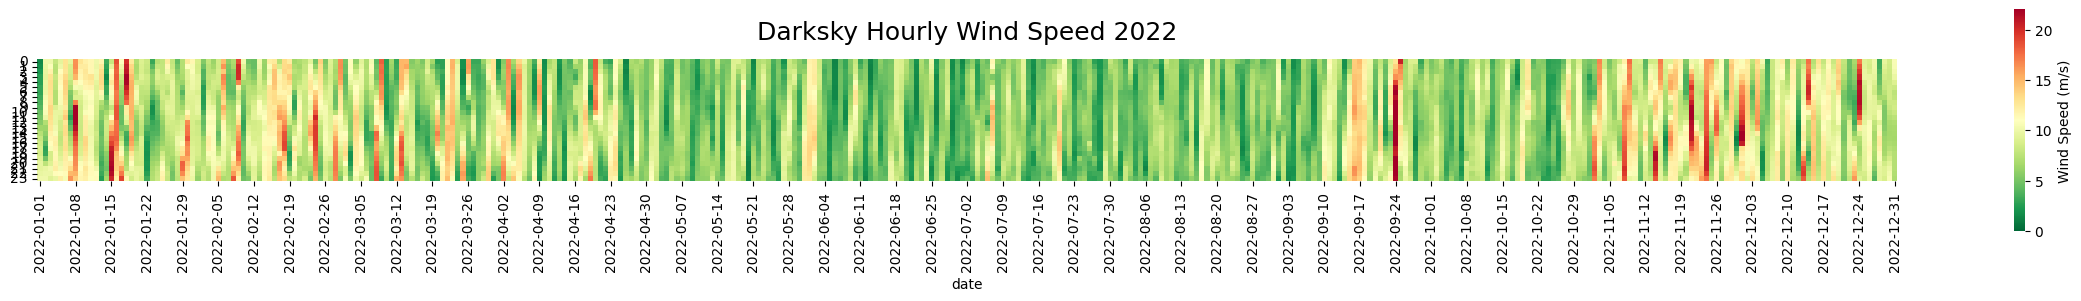

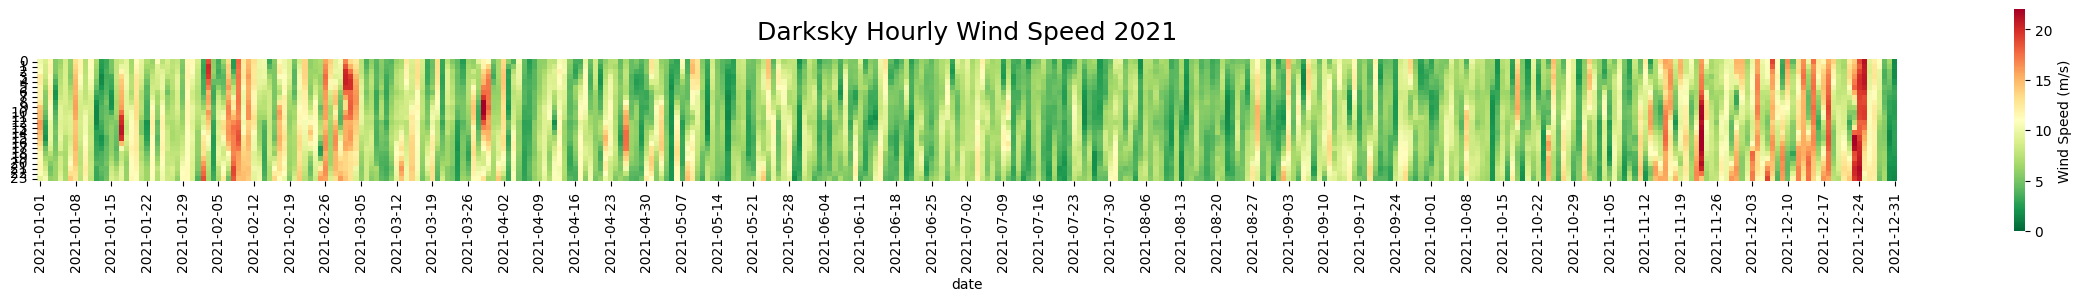

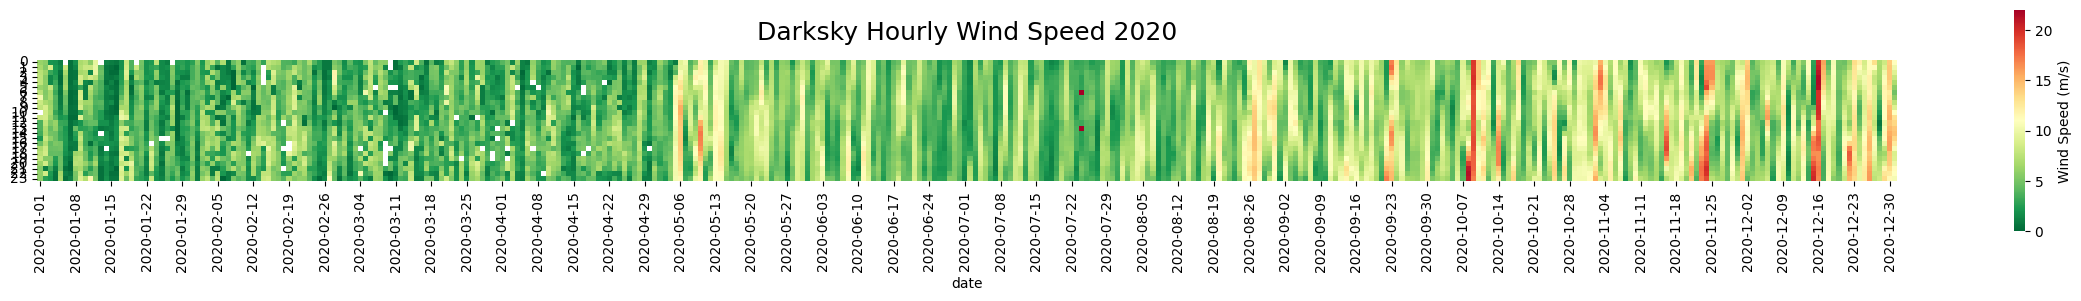

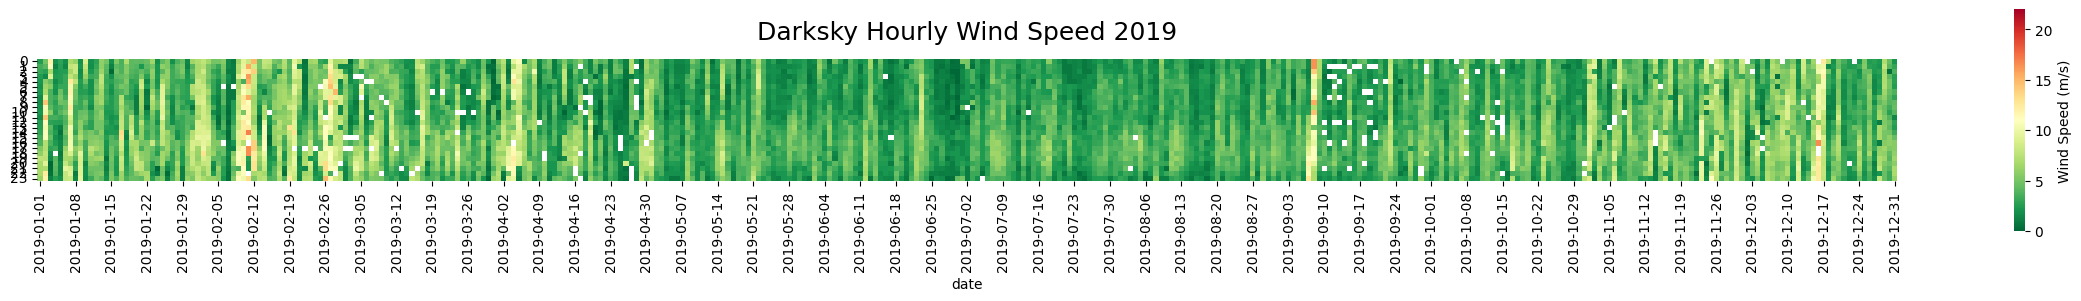

In [69]:
plot_heatmap_year4(2022)
plot_heatmap_year4(2021)
plot_heatmap_year4(2020)
plot_heatmap_year4(2019)

In [70]:
def plot_heatmap_year4a(year, variable):
    #plt.figure(figsize = (30, 6))
    allByYear_df = var4a.loc[var4a['year'] == year]
    allByYear_df = pd.pivot_table(allByYear_df, values=variable,
                                  index=["hour"], columns=["date"], fill_value=None)
    allByYear_df = allByYear_df.set_index([[hour_abbr[i] for i in list(allByYear_df.index)]])
    #ax = sns.heatmap(allByYear_df, cmap = 'RdYlGn_r', xticklabels=7,
    #                 vmin=0, vmax=22, #vmin=900, vmax=1700,
    #                 annot=False, linewidths=0,
    #                 annot_kws={"size": 6}, square=True, cbar_kws={"shrink": .48, 'label': 'Wind Speed (m/s)'})
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    #xaxis52 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
    #ax.set_xticks(xaxis52, labels=None)
    #ax.set_xticklabels([i for i in range(52)])#, rotation = 0, fontsize = 12)
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=7))
    #ax.tick_params(rotation = 0)
    #plt.title(f'Darksky Hourly Wind Speed {year}', fontdict={'fontsize':18}, pad=14);
    return allByYear_df

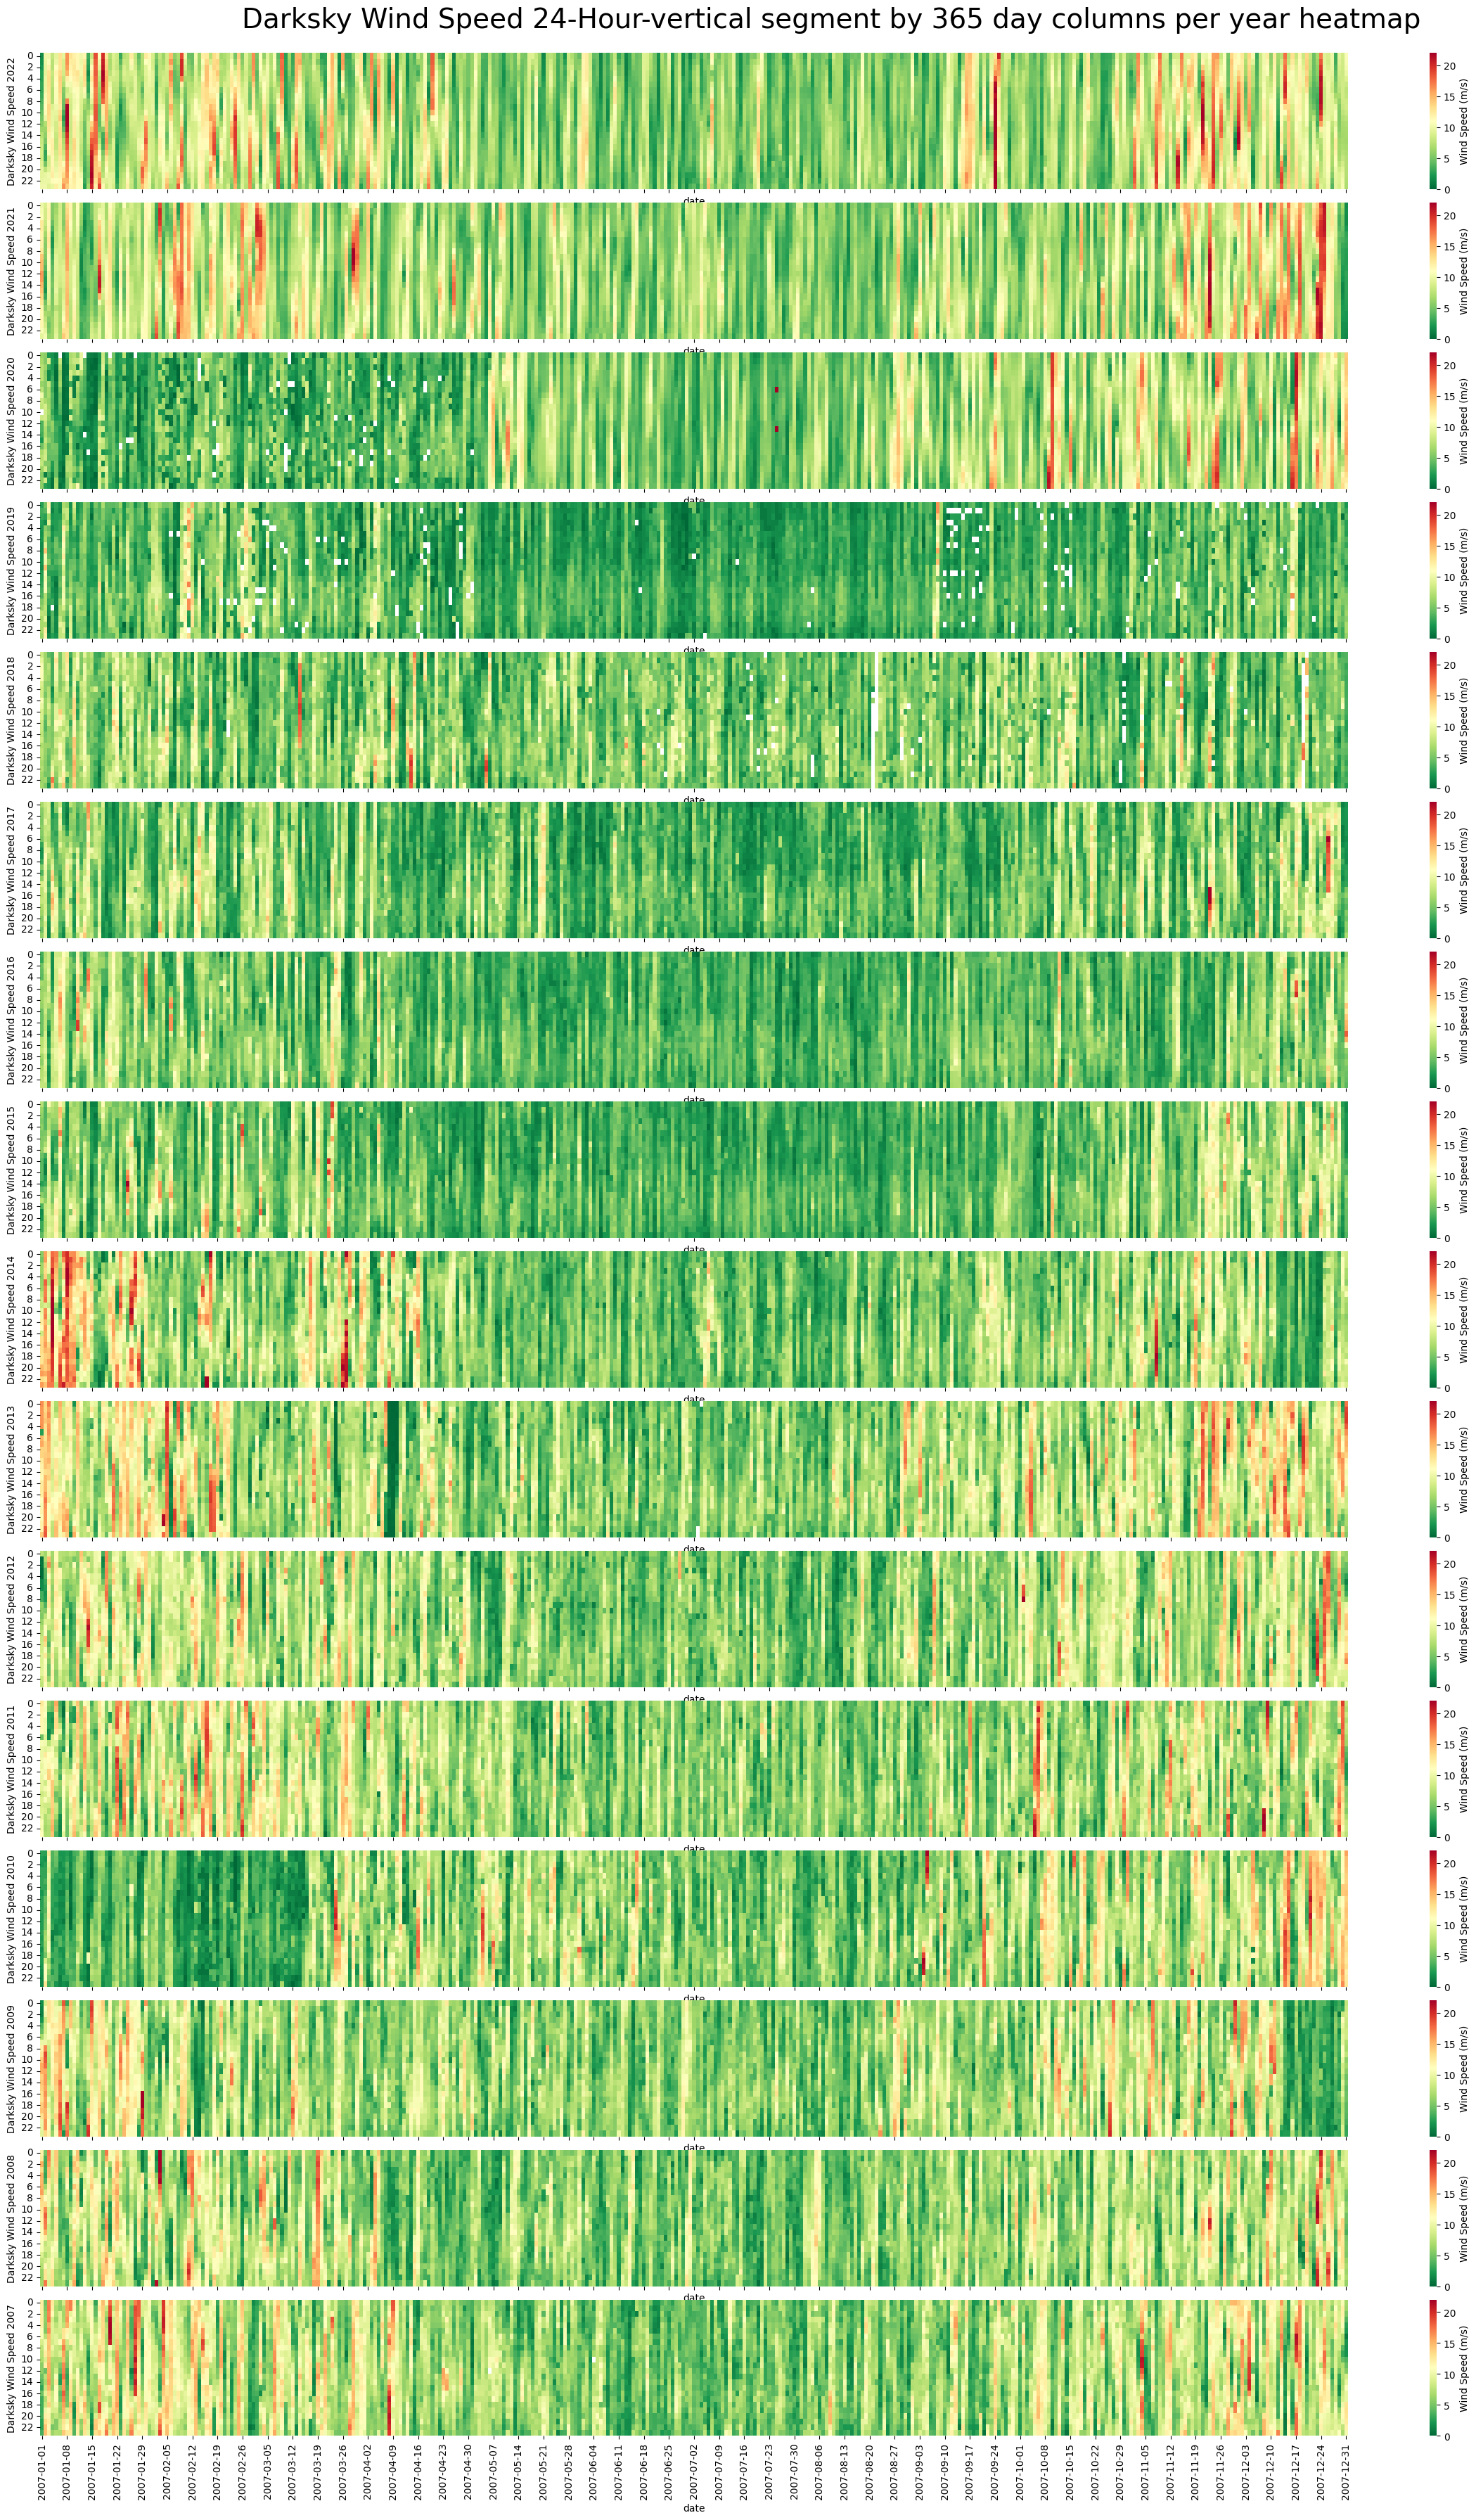

In [71]:
fig, axs4 = plt.subplots(16, figsize=(30,44),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('Darksky Wind Speed 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=28)

#(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17) = axs3
#plot_heatmap_year3(2023)#, ax=ax1)
#plot_heatmap_year3(2022)#, ax=ax2)

sns.heatmap(ax=axs4[0], data=plot_heatmap_year4a(2022, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[1], data=plot_heatmap_year4a(2021, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[2], data=plot_heatmap_year4a(2020, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[3], data=plot_heatmap_year4a(2019, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[4], data=plot_heatmap_year4a(2018, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[5], data=plot_heatmap_year4a(2017, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[6], data=plot_heatmap_year4a(2016, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[7], data=plot_heatmap_year4a(2015, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[8], data=plot_heatmap_year4a(2014, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[9], data=plot_heatmap_year4a(2013, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[10], data=plot_heatmap_year4a(2012, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[11], data=plot_heatmap_year4a(2011, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[12], data=plot_heatmap_year4a(2010, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[13], data=plot_heatmap_year4a(2009, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[14], data=plot_heatmap_year4a(2008, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})

sns.heatmap(ax=axs4[15], data=plot_heatmap_year4a(2007, "winds"), cmap = 'RdYlGn_r', xticklabels=7,
                     vmin=0, vmax=22,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': 'Wind Speed (m/s)'})


#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#axs3.xaxis.set_minor_formatter(date_form)

yearlist2 = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

for year, ax in enumerate(axs4.flat):
    ax.set(ylabel=f'Darksky Wind Speed {yearlist2[year]}')#, title='OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')
    #ax.format_xdata = date_form
    #ax.xaxis.set_minor_locator(date_form)
    #ax.xaxis.set_minor_formatter(date_form)
    #xaxis8760 = [i for i in range(8760)]
    #ax.set_xticks(xaxis8760, labels=None)
    #ax.set_xticklabels(xaxis8760)
#    ax.set_xticks(xaxis2b, labels=None)
#    ax.set_xticklabels(xaxisHours, rotation=45)
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
#    #ax1.set_xlim([0, 5])
#    ax.set_ylim([800, 2000])
#    ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)

#plt.savefig(fname = "figure04.png", \
#                    dpi=125,
#                    bbox_inches='tight')

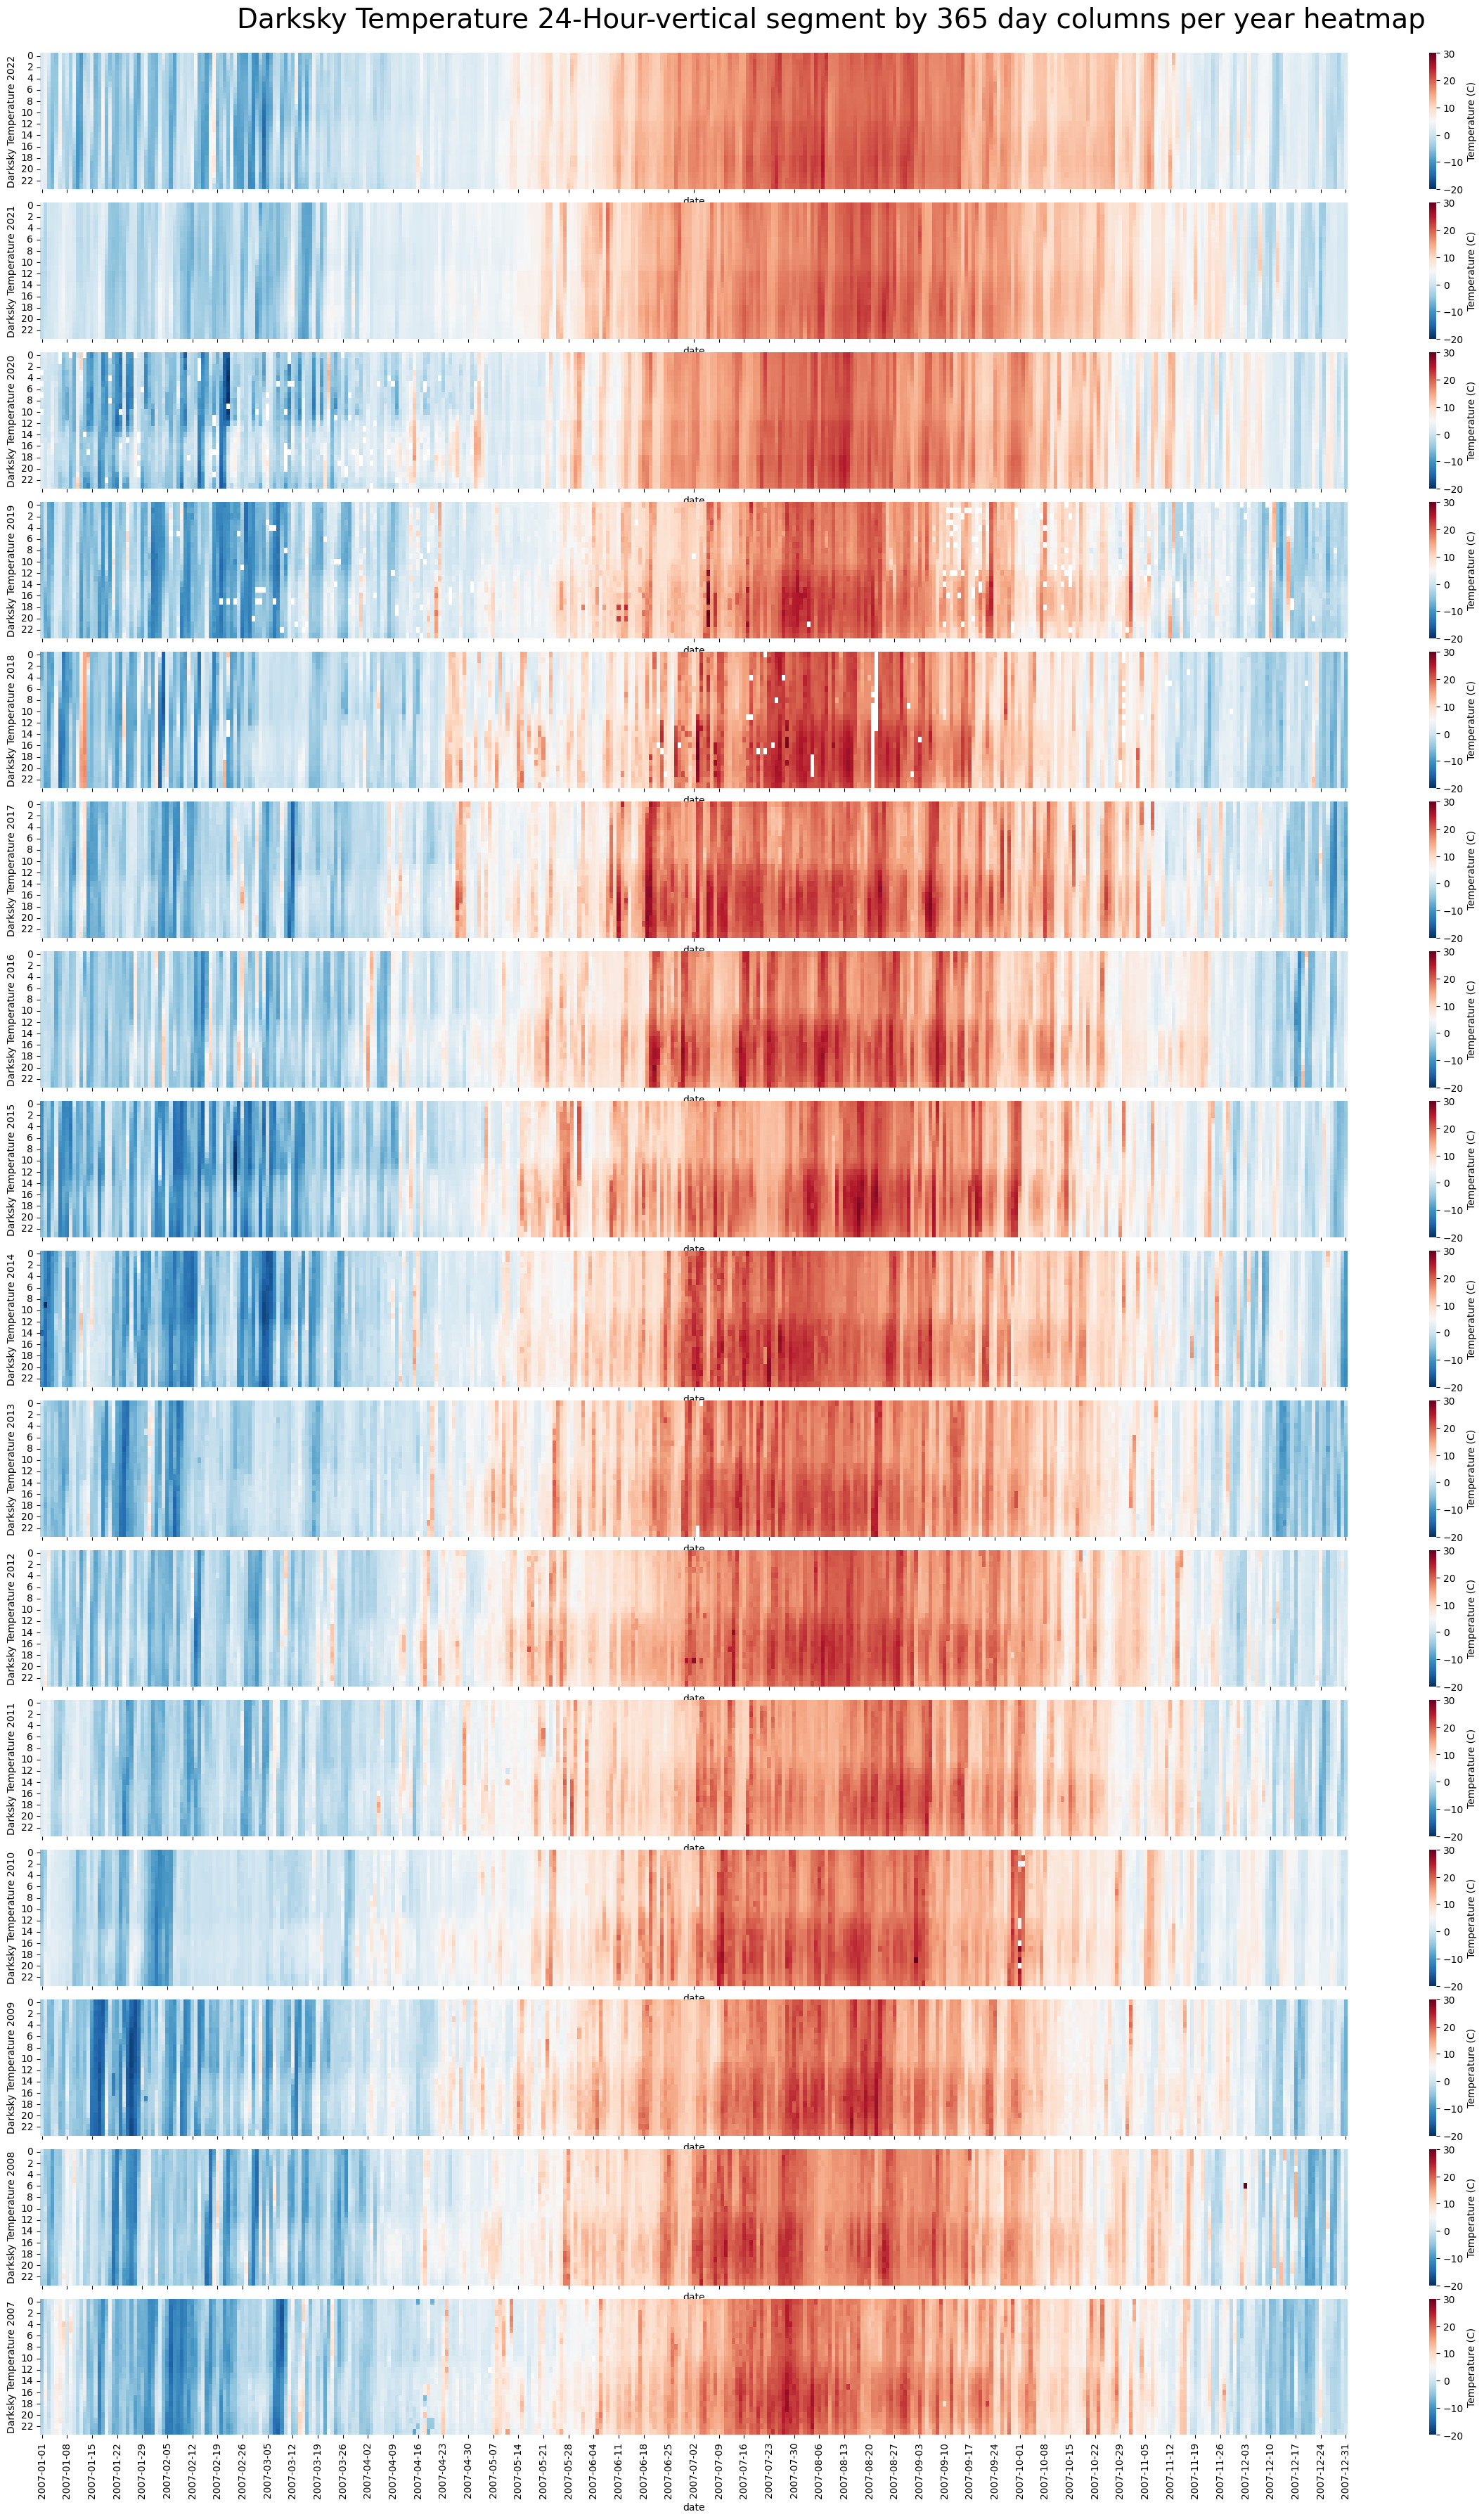

In [72]:
fig, axs4 = plt.subplots(16, figsize=(30,44),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

fig.suptitle('Darksky Temperature 24-Hour-vertical segment by 365 day columns per year heatmap', y=0.895, ha='center', fontsize=28)

#(ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17) = axs3
#plot_heatmap_year3(2023)#, ax=ax1)
#plot_heatmap_year3(2022)#, ax=ax2)
weather = "temp"
colormaps='RdBu_r'
vminimum=-20
vmaximum=30
weathervar='Temperature (C)'

sns.heatmap(ax=axs4[0], data=plot_heatmap_year4a(2022, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[1], data=plot_heatmap_year4a(2021, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[2], data=plot_heatmap_year4a(2020, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[3], data=plot_heatmap_year4a(2019, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[4], data=plot_heatmap_year4a(2018, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[5], data=plot_heatmap_year4a(2017, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[6], data=plot_heatmap_year4a(2016, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[7], data=plot_heatmap_year4a(2015, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[8], data=plot_heatmap_year4a(2014, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[9], data=plot_heatmap_year4a(2013, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[10], data=plot_heatmap_year4a(2012, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[11], data=plot_heatmap_year4a(2011, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[12], data=plot_heatmap_year4a(2010, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[13], data=plot_heatmap_year4a(2009, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[14], data=plot_heatmap_year4a(2008, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})

sns.heatmap(ax=axs4[15], data=plot_heatmap_year4a(2007, weather), cmap = colormaps, xticklabels=7,
                     vmin=vminimum, vmax=vmaximum,
                     annot=False, linewidths=0,
                     annot_kws={"size": 4}, cbar_kws={"shrink": 1, 'label': weathervar})


#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#axs3.xaxis.set_minor_formatter(date_form)

yearlist2 = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

for year, ax in enumerate(axs4.flat):
    ax.set(ylabel=f'Darksky Temperature {yearlist2[year]}')#, title='OASIS 24-Hour-vertical segment by 365 day columns per year heatmap')
    #ax.format_xdata = date_form
    #ax.xaxis.set_minor_locator(date_form)
    #ax.xaxis.set_minor_formatter(date_form)
    #xaxis8760 = [i for i in range(8760)]
    #ax.set_xticks(xaxis8760, labels=None)
    #ax.set_xticklabels(xaxis8760)
#    ax.set_xticks(xaxis2b, labels=None)
#    ax.set_xticklabels(xaxisHours, rotation=45)
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
#    #ax1.set_xlim([0, 5])
#    ax.set_ylim([800, 2000])
#    ax.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)

#plt.savefig(fname = "figure05.png", \
#                    dpi=125,
#                    bbox_inches='tight')

In [73]:
hourly_df2

datetime  hour_index  load_MW
datetime                                                    
2007-01-01 00:00:00 2007-01-01 00:00:00           1   1580.0
2007-01-01 01:00:00 2007-01-01 01:00:00           2   1533.0
2007-01-01 02:00:00 2007-01-01 02:00:00           3   1495.0
2007-01-01 03:00:00 2007-01-01 03:00:00           4   1446.0
2007-01-01 04:00:00 2007-01-01 04:00:00           5   1406.0
...                                 ...         ...      ...
2024-12-31 19:00:00 2024-12-31 19:00:00        8779      NaN
2024-12-31 20:00:00 2024-12-31 20:00:00        8780      NaN
2024-12-31 21:00:00 2024-12-31 21:00:00        8781      NaN
2024-12-31 22:00:00 2024-12-31 22:00:00        8782      NaN
2024-12-31 23:00:00 2024-12-31 23:00:00        8783      NaN

[157798 rows x 3 columns]

In [74]:
df2024 = pd.read_csv("2024_nsphourly.csv", parse_dates=["datetime"])
print(df2024.head())

   hour_index            datetime  load_MW
0           1 2024-01-01 01:00:00  1472.10
1           2 2024-01-01 02:00:00  1446.02
2           3 2024-01-01 03:00:00  1421.85
3           4 2024-01-01 04:00:00  1408.93
4           5 2024-01-01 05:00:00  1408.98


In [75]:
hourly_df2 = pd.read_parquet('./oasis_07_23.parquet')

In [76]:
hourly_df = pd.concat([hourly_df2, df2024], ignore_index=True, sort=True)

In [77]:
hourly_df[hourly_df['datetime'].dt.year == 2024] 

datetime  hour_index  load_MW
149014 2024-01-01 01:00:00           1  1472.10
149015 2024-01-01 02:00:00           2  1446.02
149016 2024-01-01 03:00:00           3  1421.85
149017 2024-01-01 04:00:00           4  1408.93
149018 2024-01-01 05:00:00           5  1408.98
...                    ...         ...      ...
157793 2024-12-31 20:00:00        8780      NaN
157794 2024-12-31 21:00:00        8781      NaN
157795 2024-12-31 22:00:00        8782      NaN
157796 2024-12-31 23:00:00        8783      NaN
157797 2024-12-31 00:00:00        8784      NaN

[8784 rows x 3 columns]

In [78]:
hourly_df.index = pd.to_datetime(hourly_df['datetime'])

In [79]:
hourly_df = hourly_df.sort_index()

In [80]:
hourly_df

datetime  hour_index  load_MW
datetime                                                    
2007-01-01 00:00:00 2007-01-01 00:00:00           1   1580.0
2007-01-01 01:00:00 2007-01-01 01:00:00           2   1533.0
2007-01-01 02:00:00 2007-01-01 02:00:00           3   1495.0
2007-01-01 03:00:00 2007-01-01 03:00:00           4   1446.0
2007-01-01 04:00:00 2007-01-01 04:00:00           5   1406.0
...                                 ...         ...      ...
2024-12-31 19:00:00 2024-12-31 19:00:00        8779      NaN
2024-12-31 20:00:00 2024-12-31 20:00:00        8780      NaN
2024-12-31 21:00:00 2024-12-31 21:00:00        8781      NaN
2024-12-31 22:00:00 2024-12-31 22:00:00        8782      NaN
2024-12-31 23:00:00 2024-12-31 23:00:00        8783      NaN

[157798 rows x 3 columns]

In [81]:
#hourly_df.to_parquet('./oasis_07_24.parquet', compression=None)

In [82]:
#hourly_df2 = pd.read_parquet('./oasis_07_23.parquet')
#hourly_df2

In [84]:
def errorfill_nostd(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    #xaxisMon = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()

    #if np.isscalar(yerr) or len(yerr) == len(y):
    #    ymin = y - yerr
    #    ymax = y + yerr
    #elif len(yerr) == 2:
    #    ymin, ymax = yerr
    """
    ymax = y + yerr.max()
    ymin = y - yerr.min()
    """
    ax.plot(x, y, color=color, linewidth=3)
    #plt.xticks(x,xaxisMon)
    plt.margins(0.05)

In [99]:
def hourly_summer1chart2(data1, data2, data3, data4):
    #Diurnal Fig 2
    datasummer1 = data1[(data1['datetime'].dt.month < 10) & (data1['datetime'].dt.month > 3)]
    diurnalm1 = datasummer1['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals1 = datasummer1['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer2 = data2[(data2['datetime'].dt.month < 10) & (data2['datetime'].dt.month > 3)]
    diurnalm2 = datasummer2['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals2 = datasummer2['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer3 = data3[(data3['datetime'].dt.month < 10) & (data3['datetime'].dt.month > 3)]
    diurnalm3 = datasummer3['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals3 = datasummer3['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer4 = data4[(data4['datetime'].dt.month < 10) & (data4['datetime'].dt.month > 3)]
    diurnalm4 = datasummer4['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals4 = datasummer4['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    #errorfill_nostd(xaxis2b, diurnalm, yerr=None, color=colourg1, alpha_fill=0.2)
    #ax = ax if ax is not None else plt.gca()
    plt.plot(xaxis2b, diurnalm1, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm2, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm3, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm4, color=colourg1, linewidth=3)
    
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    #dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Load (MW)')
    plt.xlabel('Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW)')
    plt.tight_layout()


def hourly_winter1chart2(data):
    #Diurnal Fig 2
    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter = data[(data['datetime'].dt.month <= 3) & (data['datetime'].dt.month >= 1) | (data['datetime'].dt.month <= 12) & (data['datetime'].dt.month >= 10)]
    diurnalm = datawinter['load_MW'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnals = datawinter['load_MW'].groupby(lambda x: x.hour).std().to_numpy()
    
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    #errorfill_nostd(xaxis2b, diurnalm, yerr=None, color=colourg1, alpha_fill=0.2)
    #ax = ax if ax is not None else plt.gca()
    plt.plot(xaxis2b, diurnalm, color=colourg1, linewidth=3)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Load (MW)')
    plt.xlabel('Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW)')
    plt.tight_layout()

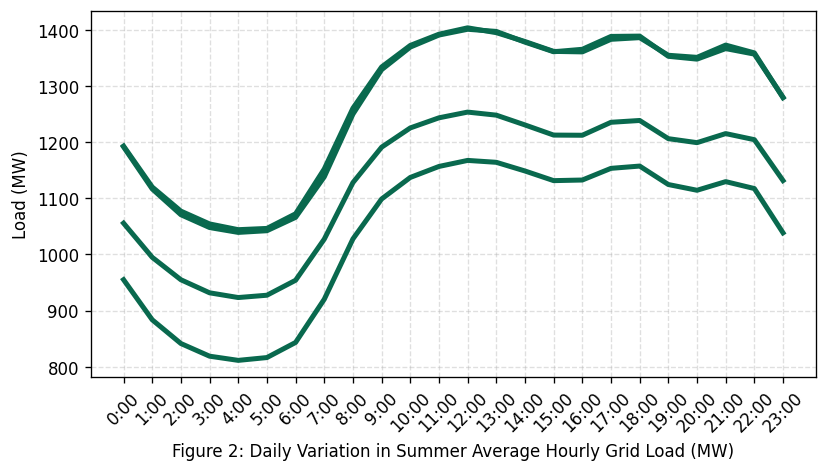

In [101]:
year2010a = oasis2[oasis2['datetime'].dt.year == 2010]
year2010b = oasis2[oasis2['datetime'].dt.year == 2011]
year2010c = oasis2[oasis2['datetime'].dt.year == 2012]
year2010d = oasis2[oasis2['datetime'].dt.year == 2013]

#hourly_winter1chart2(year2010)
hourly_summer1chart2(year2010a, year2010b, year2010c, year2010d)

In [102]:
#import matplotlib.pyplot as plt

# create data
#x = [10,20,30,40,50]
#y = [30,30,30,30,30]

# plot lines
#plt.plot(x, y, label = "line 1")
#plt.plot(y, x, label = "line 2")
#plt.legend()
#plt.show()

In [108]:
df2010a = pd.read_csv("la43987lo299082.csv")
print(df2010a.head())

   DateTime-DateHeure  UV_080m  WD_080m  TT_080m
0        200912310000     14.7      313     -7.0
1        200912310010     14.7      313     -7.0
2        200912310020     14.7      313     -7.0
3        200912310030     14.7      313     -7.0
4        200912310040     14.7      313     -7.0


In [113]:
#df2010a.index = pd.to_datetime(df2010a['DateTime-DateHeure'])
#df2010a['DateTime-DateHeure'] = df2010a['DateTime-DateHeure'].dt.strftime('%Y%m%d%H%M')
import datetime
#time = datetime.datetime.strptime(df2010a['DateTime-DateHeure'], '%Y%m%d%H%M')
df2010a['time'] = pd.to_datetime(df2010a['DateTime-DateHeure'], format='%Y%m%d%H%M')

In [115]:
#df2010a
df2010a.index = df2010a['time']
df2010a

DateTime-DateHeure  UV_080m  WD_080m  TT_080m  \
time                                                                 
2009-12-31 00:00:00        200912310000     14.7      313     -7.0   
2009-12-31 00:10:00        200912310010     14.7      313     -7.0   
2009-12-31 00:20:00        200912310020     14.7      313     -7.0   
2009-12-31 00:30:00        200912310030     14.7      313     -7.0   
2009-12-31 00:40:00        200912310040     14.7      313     -7.0   
...                                 ...      ...      ...      ...   
2011-01-01 23:10:00        201101012310     11.9      342      3.4   
2011-01-01 23:20:00        201101012320     12.0      342      3.4   
2011-01-01 23:30:00        201101012330     12.1      342      3.3   
2011-01-01 23:40:00        201101012340     12.1      342      3.3   
2011-01-01 23:50:00        201101012350     12.2      342      3.3   

                                   time  
time                                     
2009-12-31 00:00:00 2009-12-31 00:00:00  
2009-12-31 00:10:00 2009-12-31 00:10:00  
2009-12-31 00:20:00 2009-12-31 00:20:00  
2009-12-31 00:30:00 2009-12-31 00:30:00  
2009-12-31 00:40:00 2009-12-31 00:40:00  
...                                 ...  
2011-01-01 23:10:00 2011-01-01 23:10:00  
2011-01-01 23:20:00 2011-01-01 23:20:00  
2011-01-01 23:30:00 2011-01-01 23:30:00  
2011-01-01 23:40:00 2011-01-01 23:40:00  
2011-01-01 23:50:00 2011-01-01 23:50:00  

[52848 rows x 5 columns]

In [120]:
df2010a01 = df2010a[['time', 'UV_080m','WD_080m','TT_080m']]
df2010a01

time  UV_080m  WD_080m  TT_080m
time                                                              
2009-12-31 00:00:00 2009-12-31 00:00:00     14.7      313     -7.0
2009-12-31 00:10:00 2009-12-31 00:10:00     14.7      313     -7.0
2009-12-31 00:20:00 2009-12-31 00:20:00     14.7      313     -7.0
2009-12-31 00:30:00 2009-12-31 00:30:00     14.7      313     -7.0
2009-12-31 00:40:00 2009-12-31 00:40:00     14.7      313     -7.0
...                                 ...      ...      ...      ...
2011-01-01 23:10:00 2011-01-01 23:10:00     11.9      342      3.4
2011-01-01 23:20:00 2011-01-01 23:20:00     12.0      342      3.4
2011-01-01 23:30:00 2011-01-01 23:30:00     12.1      342      3.3
2011-01-01 23:40:00 2011-01-01 23:40:00     12.1      342      3.3
2011-01-01 23:50:00 2011-01-01 23:50:00     12.2      342      3.3

[52848 rows x 4 columns]

In [127]:
year2010 = df2010a01[df2010a01['time'].dt.year == 2010]

In [132]:
#summary_df = year2010.groupby(year2010['time'].dt.hour)['UV_080m'].agg(['sum', 'median', 'max', 'min'])
#summary_df
#year2010.groupby(pd.Grouper(freq='60Min', base=30, label='right')).first()
year2010.resample('60min', label='right').first()
#lat 43987
#lo 299082

time  UV_080m  WD_080m  TT_080m
time                                                              
2010-01-01 01:00:00 2010-01-01 00:00:00      4.5      317     -3.4
2010-01-01 02:00:00 2010-01-01 01:00:00      3.9      315     -3.2
2010-01-01 03:00:00 2010-01-01 02:00:00      3.3      321     -3.1
2010-01-01 04:00:00 2010-01-01 03:00:00      2.8      332     -3.0
2010-01-01 05:00:00 2010-01-01 04:00:00      2.1      347     -3.0
...                                 ...      ...      ...      ...
2010-12-31 20:00:00 2010-12-31 19:00:00      9.8      300      2.7
2010-12-31 21:00:00 2010-12-31 20:00:00     10.0      300      2.9
2010-12-31 22:00:00 2010-12-31 21:00:00     10.1      301      3.2
2010-12-31 23:00:00 2010-12-31 22:00:00     10.4      301      3.5
2011-01-01 00:00:00 2010-12-31 23:00:00     10.5      302      3.8

[8760 rows x 4 columns]

In [137]:
year2010['lat'] = 43.987
year2010['long'] = 360-299.082
#year2010['lat'] = pd.Series([43.987] * len(year2010.index))
#year2010['long'] = pd.Series([360-299.082] * len(year2010.index))
#[0] * len(df.index)
year2010

/tmp/ipykernel_3049/3950778399.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3049/3950778399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



time  UV_080m  WD_080m  TT_080m     lat  \
time                                                                         
2010-01-01 00:00:00 2010-01-01 00:00:00      4.5      317     -3.4  43.987   
2010-01-01 00:10:00 2010-01-01 00:10:00      4.4      318     -3.4  43.987   
2010-01-01 00:20:00 2010-01-01 00:20:00      4.4      320     -3.3  43.987   
2010-01-01 00:30:00 2010-01-01 00:30:00      4.2      321     -3.3  43.987   
2010-01-01 00:40:00 2010-01-01 00:40:00      4.1      319     -3.3  43.987   
...                                 ...      ...      ...      ...     ...   
2010-12-31 23:10:00 2010-12-31 23:10:00     10.5      303      3.9  43.987   
2010-12-31 23:20:00 2010-12-31 23:20:00     10.6      303      3.9  43.987   
2010-12-31 23:30:00 2010-12-31 23:30:00     10.6      303      4.0  43.987   
2010-12-31 23:40:00 2010-12-31 23:40:00     10.6      303      4.0  43.987   
2010-12-31 23:50:00 2010-12-31 23:50:00     10.6      303      4.0  43.987   

                       long  
time                         
2010-01-01 00:00:00  60.918  
2010-01-01 00:10:00  60.918  
2010-01-01 00:20:00  60.918  
2010-01-01 00:30:00  60.918  
2010-01-01 00:40:00  60.918  
...                     ...  
2010-12-31 23:10:00  60.918  
2010-12-31 23:20:00  60.918  
2010-12-31 23:30:00  60.918  
2010-12-31 23:40:00  60.918  
2010-12-31 23:50:00  60.918  

[52560 rows x 6 columns]

In [209]:
def windatlas(csv, lat, long):
    df2010a = pd.read_csv(csv)
    #print(df2010a.head())
    df2010a['time'] = pd.to_datetime(df2010a['DateTime-DateHeure'], format='%Y%m%d%H%M')
    #df2010a.index = df2010a['time']
    #df2010a
    df2010a01 = df2010a[['time', 'UV_080m','WD_080m','TT_080m']]
    year2010 = df2010a01[df2010a01['time'].dt.year == 2010]
    year2010.index = year2010['time']
    year= year2010.resample('60min', label='left').first()
    year['lat'] = lat
    year['long'] = -(360-long)
    year1 = year[year['time'].dt.year == 2010]
    return year1
    

In [210]:
line1_2010 = windatlas("la43987lo299082.csv", 43.987, 299.082)
line1_2010

time  UV_080m  WD_080m  TT_080m     lat  \
time                                                                         
2010-01-01 00:00:00 2010-01-01 00:00:00      4.5      317     -3.4  43.987   
2010-01-01 01:00:00 2010-01-01 01:00:00      3.9      315     -3.2  43.987   
2010-01-01 02:00:00 2010-01-01 02:00:00      3.3      321     -3.1  43.987   
2010-01-01 03:00:00 2010-01-01 03:00:00      2.8      332     -3.0  43.987   
2010-01-01 04:00:00 2010-01-01 04:00:00      2.1      347     -3.0  43.987   
...                                 ...      ...      ...      ...     ...   
2010-12-31 19:00:00 2010-12-31 19:00:00      9.8      300      2.7  43.987   
2010-12-31 20:00:00 2010-12-31 20:00:00     10.0      300      2.9  43.987   
2010-12-31 21:00:00 2010-12-31 21:00:00     10.1      301      3.2  43.987   
2010-12-31 22:00:00 2010-12-31 22:00:00     10.4      301      3.5  43.987   
2010-12-31 23:00:00 2010-12-31 23:00:00     10.5      302      3.8  43.987   

                       long  
time                         
2010-01-01 00:00:00 -60.918  
2010-01-01 01:00:00 -60.918  
2010-01-01 02:00:00 -60.918  
2010-01-01 03:00:00 -60.918  
2010-01-01 04:00:00 -60.918  
...                     ...  
2010-12-31 19:00:00 -60.918  
2010-12-31 20:00:00 -60.918  
2010-12-31 21:00:00 -60.918  
2010-12-31 22:00:00 -60.918  
2010-12-31 23:00:00 -60.918  

[8760 rows x 6 columns]

In [211]:
line2_2010 =windatlas("la44330lo299309.csv", 43.330, 299.309)
line2_2010

time  UV_080m  WD_080m  TT_080m    lat  \
time                                                                        
2010-01-01 00:00:00 2010-01-01 00:00:00      3.4      332     -3.5  43.33   
2010-01-01 01:00:00 2010-01-01 01:00:00      3.1      333     -3.3  43.33   
2010-01-01 02:00:00 2010-01-01 02:00:00      2.7      328     -3.1  43.33   
2010-01-01 03:00:00 2010-01-01 03:00:00      2.6      348     -3.1  43.33   
2010-01-01 04:00:00 2010-01-01 04:00:00      2.1      355     -3.1  43.33   
...                                 ...      ...      ...      ...    ...   
2010-12-31 19:00:00 2010-12-31 19:00:00      9.2      298      2.2  43.33   
2010-12-31 20:00:00 2010-12-31 20:00:00      9.2      297      2.4  43.33   
2010-12-31 21:00:00 2010-12-31 21:00:00      9.4      297      2.6  43.33   
2010-12-31 22:00:00 2010-12-31 22:00:00      9.6      298      2.9  43.33   
2010-12-31 23:00:00 2010-12-31 23:00:00      9.5      300      3.2  43.33   

                       long  
time                         
2010-01-01 00:00:00 -60.691  
2010-01-01 01:00:00 -60.691  
2010-01-01 02:00:00 -60.691  
2010-01-01 03:00:00 -60.691  
2010-01-01 04:00:00 -60.691  
...                     ...  
2010-12-31 19:00:00 -60.691  
2010-12-31 20:00:00 -60.691  
2010-12-31 21:00:00 -60.691  
2010-12-31 22:00:00 -60.691  
2010-12-31 23:00:00 -60.691  

[8760 rows x 6 columns]

In [212]:
line3_2010 =windatlas("la44972lo299453.csv", 44.972, 299.453)
line3_2010

time  UV_080m  WD_080m  TT_080m     lat  \
time                                                                         
2010-01-01 00:00:00 2010-01-01 00:00:00      4.9      339     -3.5  44.972   
2010-01-01 01:00:00 2010-01-01 01:00:00      4.7      336     -3.5  44.972   
2010-01-01 02:00:00 2010-01-01 02:00:00      4.9      345     -3.4  44.972   
2010-01-01 03:00:00 2010-01-01 03:00:00      4.8      353     -3.5  44.972   
2010-01-01 04:00:00 2010-01-01 04:00:00      4.4      359     -3.6  44.972   
...                                 ...      ...      ...      ...     ...   
2010-12-31 19:00:00 2010-12-31 19:00:00      9.6      302      1.9  44.972   
2010-12-31 20:00:00 2010-12-31 20:00:00      9.4      304      2.0  44.972   
2010-12-31 21:00:00 2010-12-31 21:00:00      9.4      305      2.0  44.972   
2010-12-31 22:00:00 2010-12-31 22:00:00      9.3      305      2.0  44.972   
2010-12-31 23:00:00 2010-12-31 23:00:00      9.3      303      1.9  44.972   

                       long  
time                         
2010-01-01 00:00:00 -60.547  
2010-01-01 01:00:00 -60.547  
2010-01-01 02:00:00 -60.547  
2010-01-01 03:00:00 -60.547  
2010-01-01 04:00:00 -60.547  
...                     ...  
2010-12-31 19:00:00 -60.547  
2010-12-31 20:00:00 -60.547  
2010-12-31 21:00:00 -60.547  
2010-12-31 22:00:00 -60.547  
2010-12-31 23:00:00 -60.547  

[8760 rows x 6 columns]

In [213]:
line4_2010 = windatlas("la46464lo300043.csv", 46.464, 300.043)
line4_2010

time  UV_080m  WD_080m  TT_080m     lat  \
time                                                                         
2010-01-01 00:00:00 2010-01-01 00:00:00      8.0      330     -4.2  46.464   
2010-01-01 01:00:00 2010-01-01 01:00:00      8.1      329     -4.2  46.464   
2010-01-01 02:00:00 2010-01-01 02:00:00      8.2      328     -4.3  46.464   
2010-01-01 03:00:00 2010-01-01 03:00:00      8.3      327     -4.4  46.464   
2010-01-01 04:00:00 2010-01-01 04:00:00      8.3      328     -4.6  46.464   
...                                 ...      ...      ...      ...     ...   
2010-12-31 19:00:00 2010-12-31 19:00:00     12.4      310      1.9  46.464   
2010-12-31 20:00:00 2010-12-31 20:00:00     12.4      307      1.9  46.464   
2010-12-31 21:00:00 2010-12-31 21:00:00     12.5      306      1.8  46.464   
2010-12-31 22:00:00 2010-12-31 22:00:00     12.6      304      1.8  46.464   
2010-12-31 23:00:00 2010-12-31 23:00:00     12.4      302      1.7  46.464   

                       long  
time                         
2010-01-01 00:00:00 -59.957  
2010-01-01 01:00:00 -59.957  
2010-01-01 02:00:00 -59.957  
2010-01-01 03:00:00 -59.957  
2010-01-01 04:00:00 -59.957  
...                     ...  
2010-12-31 19:00:00 -59.957  
2010-12-31 20:00:00 -59.957  
2010-12-31 21:00:00 -59.957  
2010-12-31 22:00:00 -59.957  
2010-12-31 23:00:00 -59.957  

[8760 rows x 6 columns]

In [246]:
linefour_df = pd.concat([line1_2010, line2_2010, line3_2010, line4_2010], ignore_index=True, sort=False)

In [247]:
linefour_df

time  UV_080m  WD_080m  TT_080m     lat    long
0     2010-01-01 00:00:00      4.5      317     -3.4  43.987 -60.918
1     2010-01-01 01:00:00      3.9      315     -3.2  43.987 -60.918
2     2010-01-01 02:00:00      3.3      321     -3.1  43.987 -60.918
3     2010-01-01 03:00:00      2.8      332     -3.0  43.987 -60.918
4     2010-01-01 04:00:00      2.1      347     -3.0  43.987 -60.918
...                   ...      ...      ...      ...     ...     ...
35035 2010-12-31 19:00:00     12.4      310      1.9  46.464 -59.957
35036 2010-12-31 20:00:00     12.4      307      1.9  46.464 -59.957
35037 2010-12-31 21:00:00     12.5      306      1.8  46.464 -59.957
35038 2010-12-31 22:00:00     12.6      304      1.8  46.464 -59.957
35039 2010-12-31 23:00:00     12.4      302      1.7  46.464 -59.957

[35040 rows x 6 columns]

In [248]:
linefour_df.rename(columns={'UV_080m': 'winds_ms', 'WD_080m': 'windd', 'TT_080m': 'temp'}, inplace=True)

In [249]:
linefour_df['lat'].unique()

array([43.987, 43.33 , 44.972, 46.464])

In [250]:
lines1 = linefour_df[(linefour_df['lat'] == 43.987)]
lines2 = linefour_df[(linefour_df['lat'] == 43.33)]
lines3 = linefour_df[(linefour_df['lat'] == 44.972)]
lines4 = linefour_df[(linefour_df['lat'] == 46.464)]

In [262]:
def hourly_summer1chart3(data1, data2, data3, data4):
    #Diurnal Fig 2
    datasummer1 = data1[(data1['time'].dt.month < 10) & (data1['time'].dt.month > 3)]
    ##diurnalm1 = datasummer1['winds_ms'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnalm1 = datasummer1['winds_ms'].groupby(datasummer1['time'].dt.hour).mean()
    #diurnals1 = datasummer1['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer2 = data2[(data2['time'].dt.month < 10) & (data2['time'].dt.month > 3)]
    #diurnalm2 = datasummer2['winds_ms'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnalm2 = datasummer2['winds_ms'].groupby(datasummer2['time'].dt.hour).mean()
    #diurnals2 = datasummer2['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer3 = data3[(data3['time'].dt.month < 10) & (data3['time'].dt.month > 3)]
    #diurnalm3 = datasummer3['winds_ms'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnalm3 = datasummer3['winds_ms'].groupby(datasummer3['time'].dt.hour).mean()
    #diurnals3 = datasummer3['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datasummer4 = data4[(data4['time'].dt.month < 10) & (data4['time'].dt.month > 3)]
    #diurnalm4 = datasummer4['winds_ms'].groupby(lambda x: x.hour).mean().to_numpy()
    diurnalm4 = datasummer4['winds_ms'].groupby(datasummer4['time'].dt.hour).mean()
    #diurnals4 = datasummer4['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()
    #diurnalm4
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    #errorfill_nostd(xaxis2b, diurnalm, yerr=None, color=colourg1, alpha_fill=0.2)
    #ax = ax if ax is not None else plt.gca()
    plt.plot(xaxis2b, diurnalm1, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm2, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm3, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm4, color=colourg1, linewidth=3)
    
    plt.xticks(xaxis2b, xaxisHours, rotation=45)
    plt.margins(0.05)
    #dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Wind Speed (m/s)')
    #plt.xlabel('Figure 2: Daily Variation in Summer Average Hourly Grid Load (MW)')
    plt.xlabel('Figure 3: 2010 Daily Variation in Summer Average Hourly Wind Speed (m/s)')
    plt.tight_layout()
    #return diurnalm4


def hourly_winter1chart3(data1, data2, data3, data4):
    #Diurnal Fig 2
    datawinter1 = data1[(data1['time'].dt.month <= 3) & (data1['time'].dt.month >= 1) | (data1['time'].dt.month <= 12) & (data1['time'].dt.month >= 10)]
    diurnalm1 = datawinter1['winds_ms'].groupby(datawinter1['time'].dt.hour).mean()
    #diurnals = datawinter['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter2 = data2[(data2['time'].dt.month <= 3) & (data2['time'].dt.month >= 1) | (data2['time'].dt.month <= 12) & (data2['time'].dt.month >= 10)]
    diurnalm2 = datawinter2['winds_ms'].groupby(datawinter2['time'].dt.hour).mean()
    #diurnals = datawinter['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter3 = data3[(data3['time'].dt.month <= 3) & (data3['time'].dt.month >= 1) | (data3['time'].dt.month <= 12) & (data3['time'].dt.month >= 10)]
    diurnalm3 = datawinter3['winds_ms'].groupby(datawinter3['time'].dt.hour).mean()
    #diurnals = datawinter['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()

    datawinter4 = data4[(data4['time'].dt.month <= 3) & (data4['time'].dt.month >= 1) | (data4['time'].dt.month <= 12) & (data4['time'].dt.month >= 10)]
    diurnalm4 = datawinter4['winds_ms'].groupby(datawinter4['time'].dt.hour).mean()
    #diurnals = datawinter['winds_ms'].groupby(lambda x: x.hour).std().to_numpy()
    
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    #errorfill_nostd(xaxis2b, diurnalm, yerr=None, color=colourg1, alpha_fill=0.2)
    #ax = ax if ax is not None else plt.gca()
    #plt.plot(xaxis2b, diurnalm, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm1, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm2, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm3, color=colourg1, linewidth=3)
    plt.plot(xaxis2b, diurnalm4, color=colourg1, linewidth=3)
    
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    #dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Wind Speed (m/s))')
    #plt.xlabel('Figure 2: Daily Variation in Winter Average Hourly Grid Load (MW)')
    plt.xlabel('Figure 3: 2010 Daily Variation in Winter Average Hourly Wind Speed (m/s)')
    plt.tight_layout()

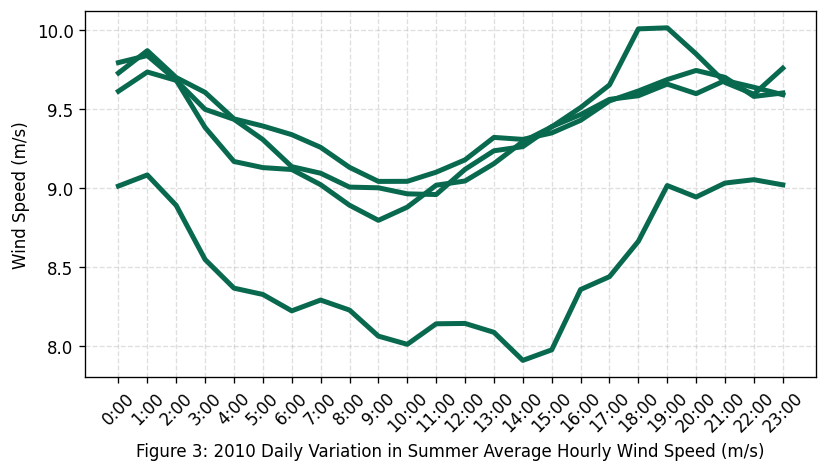

In [263]:
hourly_summer1chart3(lines1, lines2, lines3, lines4)

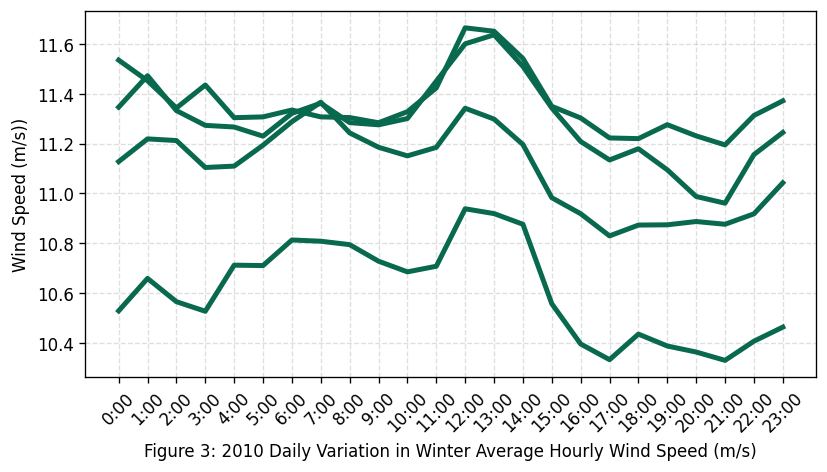

In [264]:
hourly_winter1chart3(lines1, lines2, lines3, lines4)

In [281]:
def hourly_summer4chart(data):
    #Diurnal Fig 2
    datasummer = data[(data['time'].dt.month < 10) & (data['time'].dt.month > 3)]
    diurnalm = datasummer['winds'].groupby(datasummer['time'].dt.hour).mean()
    diurnals = datasummer['winds'].groupby(datasummer['time'].dt.hour).std()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Wind Speeds (m/s)')
    plt.xlabel('Figure 2: Onshore Daily Variation in Summer Average Hourly Wind Speeds (m/s)')
    plt.tight_layout()

In [282]:
def hourly_winter4chart(data):
    #Diurnal Fig 2
    datawinter = data[(data['time'].dt.month <= 3) & (data['time'].dt.month >= 1) | (data['time'].dt.month <= 12) & (data['time'].dt.month >= 10)]
    diurnalm = datawinter['winds'].groupby(datawinter['time'].dt.hour).mean()
    diurnals = datawinter['winds'].groupby(datawinter['time'].dt.hour).std()
    xaxis2b = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    xaxisHours = ["0:00","1:00","2:00","3:00","4:00","5:00","6:00","7:00","8:00","9:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]
    fig = plt.figure(figsize=(7, 4.04), dpi=120, facecolor='w', edgecolor='w')
    plt.grid(visible=True, which='major', axis='both', linestyle='--', alpha=0.4)
    #grid(color='r', linestyle='-', linewidth=2)
    colourg1 = '#09694E'
    errorfill(xaxis2b, diurnalm, yerr=diurnals, color=colourg1, alpha_fill=0.2)
    plt.xticks(xaxis2b,xaxisHours, rotation=45)
    plt.margins(0.05)
    dmaxm = (diurnals+diurnalm).max()+1
    
    plt.ylabel('Wind Speeds (m/s)')
    plt.xlabel('Figure 2: Onshore Daily Variation in Winter Average Hourly Wind Speeds (m/s)')
    plt.tight_layout()

In [270]:
#big_df

time  winds  windd  preint  prepro pretyp  temp  \
21202300 2007-01-01 00:00:00+00:00   6.82  330.0     NaN     NaN    NaN -6.69   
21202301 2007-01-01 01:00:00+00:00   6.28  337.0     NaN     NaN    NaN -6.36   
21202302 2007-01-01 02:00:00+00:00   7.29  333.0     NaN     NaN    NaN -6.36   
21202303 2007-01-01 03:00:00+00:00   6.71  339.0     NaN     NaN    NaN -6.36   
21202304 2007-01-01 04:00:00+00:00   6.91  343.0     NaN     NaN    NaN -6.22   
...                            ...    ...    ...     ...     ...    ...   ...   
52787809 2022-12-31 19:00:00+00:00   6.11  229.0     0.0     0.0    NaN  6.32   
52787810 2022-12-31 20:00:00+00:00   5.96  279.0     0.0     0.0    NaN  6.47   
52787811 2022-12-31 21:00:00+00:00   5.85  249.0     0.0     0.0    NaN  6.57   
52787812 2022-12-31 22:00:00+00:00   5.83  208.0     0.0     0.0    NaN  6.57   
52787813 2022-12-31 23:00:00+00:00   5.84  345.0     0.0     0.0    NaN  6.60   

          humid  cloud        press    dew       lat      long  
21202300   0.67    NaN  1018.799988 -11.71  46.85282 -60.30085  
21202301   0.66    NaN  1019.799988 -11.71  46.85282 -60.30085  
21202302   0.67    NaN  1020.200012 -11.42  46.85282 -60.30085  
21202303   0.69    NaN  1020.599976 -11.04  46.85282 -60.30085  
21202304   0.69    NaN  1021.099976 -11.04  46.85282 -60.30085  
...         ...    ...          ...    ...       ...       ...  
52787809   0.82   0.98  1022.200012   3.50  43.45281 -65.30085  
52787810   0.82   0.99  1022.099976   3.64  43.45281 -65.30085  
52787811   0.82   1.00  1022.000000   3.75  43.45281 -65.30085  
52787812   0.83   1.00  1022.000000   3.88  43.45281 -65.30085  
52787813   0.85   1.00  1022.099976   4.22  43.45281 -65.30085  

[31585514 rows x 13 columns]

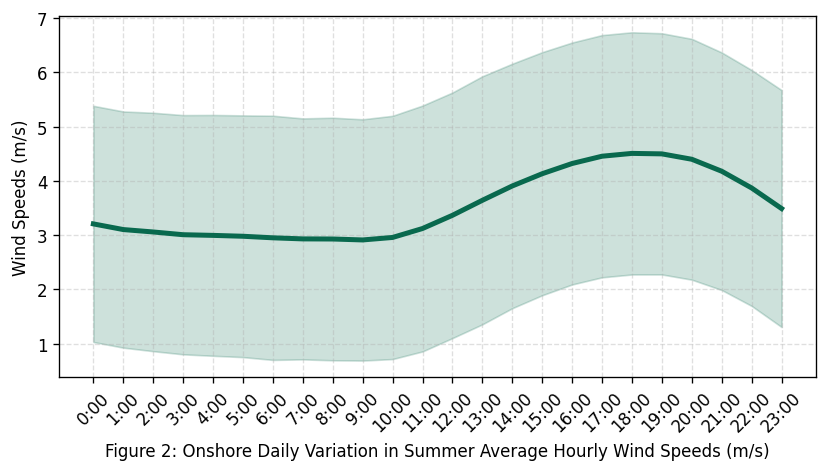

In [286]:
#year2022b = big_df[big_df['time'].dt.year == 2022]
#hourly_summer4chart(year2022b)
#hourly_winter4chart(year2022b)
hourly_summer4chart(big_df)

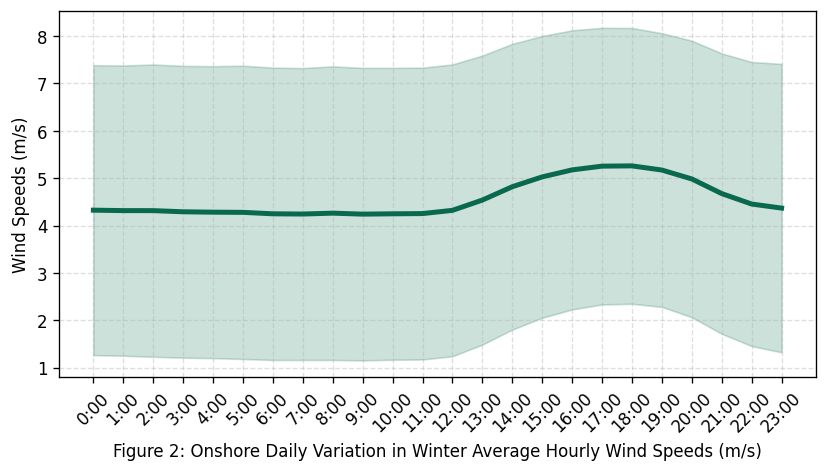

In [287]:
hourly_winter4chart(big_df)

In [289]:
#linefour_df.to_parquet('./cwahourly_fourrefcases_2010.parquet', compression=None)